### 📊 Hackathon - Analyzing Medical Insurance Costs / Analyse des Dépenses de Santé aux États-Unis

### Contexte

Ce projet a pour objectif d’explorer les dépenses de santé aux États-Unis, à deux niveaux complémentaires :

- **Vision macro** : l’évolution des dépenses totales par État et par année (1991–2020), afin de comprendre les tendances nationales et régionales.
- **Vision micro** : l’analyse détaillée des coûts individuels d’assurance santé en fonction de facteurs démographiques et comportementaux (âge, IMC, tabagisme, etc.).

### Objectifs

🔹 Identifier les principaux déterminants des dépenses de santé au niveau individuel et collectif  
🔹 Mettre en évidence les tendances temporelles et géographiques des coûts  
🔹 Proposer des visualisations claires et des insights exploitables  

### Jeux de données utilisés

- **Residence_all_tables.xlsx**  
Ce fichier contient les données macroéconomiques sur les dépenses de santé aux États-Unis :  
- **Table 11** : Dépenses de santé par habitant (en dollars) par État et par année (1991–2020), avec le taux moyen de croissance annuel.  
- **Table 21** : Population totale par État et par année sur la même période.  
Ces informations permettent d’analyser l’évolution des coûts de santé et les différences régionales.
- **insurance.csv** : données individuelles d’assurance santé (charges annuelles et variables explicatives)  

Ce notebook présente les étapes suivantes :

1️⃣ Importation et préparation des données  
2️⃣ Analyse exploratoire (EDA) des deux jeux de données  
3️⃣ Visualisations des tendances et facteurs clés  
4️⃣ Recommandations et axes d’amélioration  

---

*Ce travail servira de base pour la réalisation d’un rapport final et d’une présentation (PowerPoint ou tableau de bord interactif).*

### Chargement et préparation des données

In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from scipy.stats import ttest_ind
import warnings
from pandas.api.types import CategoricalDtype
from skimpy import skim
from itertools import combinations
warnings.filterwarnings("ignore")
import kagglehub
from scipy.stats import pearsonr
from scipy.stats import f_oneway
import plotly.express as px
from scipy.stats import kruskal
from scipy.stats import chi2_contingency
import plotly.io as pio
import plotly.express as px
from ipywidgets import interact, IntRangeSlider
pio.renderers.default = 'notebook_connected'
import imageio
import os
import cartopy.crs as ccrs
import cartopy.feature as cfeature

#### Chargement des fichiers CSV

In [86]:
# Sources des jeux de données :
# - insurance.csv : mis à disposition par l'organisateur du hackathon

df = pd.read_csv("insurance.csv")

#### Exploration des données

In [87]:
print(df.head())
skim(df)
print(df.isnull().sum())

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ Dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 1338   │ │ string      │ 3     │                                                          │
│ │ Number of columns │ 7      │ │ int64       │ 2     │                                                          │
│ └───────────────────┴────────┘ │ float64     │ 2     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━┳━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column       ┃ NA   ┃ NA %   ┃ mean    ┃ sd      ┃ p0      ┃ p25    ┃ p50    ┃ p75     ┃ p100    ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━╇━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━┩  │
│ │ age          │    0 │      0 │   39.21 │   14.05 │      18 │     27 │     39 │      51 │      64 │ ▇▆▅▆▆▅  │  │
│ │ bmi          │    0 │      0 │   30.66 │   6.098 │   15.96 │   26.3 │   30.4 │   34.69 │   53.13 │  ▂▆▇▅▁  │  │
│ │ children     │    0 │      0 │   1.095 │   1.205 │       0 │      0 │      1 │       2 │       5 │  ▇▅▃▂   │  │
│ │ charges      │    0 │      0 │   13270 │   12110 │    1122 │   4740 │   9382 │   16640 │   63770 │  ▇▃▁▁   │  │
│ └──────────────┴──────┴────────┴─────────┴─────────┴─────────┴────────┴────────┴─────────┴─────────┴─────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━┳━━━━┳━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━┓  │
│ ┃        ┃    ┃      ┃           ┃           ┃           ┃           ┃ chars per  ┃ words per   ┃ total      ┃  │
│ ┃ column ┃ NA ┃ NA % ┃ shortest  ┃ longest   ┃ min       ┃ max       ┃ row        ┃ row         ┃ words      ┃  │
│ ┡━━━━━━━━╇━━━━╇━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━┩  │
│ │ sex    │  0 │    0 │ male      │ female    │ female    │ male      │       4.99 │           1 │       1338 │  │
│ │ smoker │  0 │    0 │ no        │ yes       │ no        │ yes       │        2.2 │           1 │       1338 │  │
│ │ region │  0 │    0 │ southwest │ southwest │ northeast │ southwest │          9 │           1 │       1338 │  │
│ └────────┴────┴──────┴───────────┴───────────┴───────────┴───────────┴────────────┴─────────────┴────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [88]:
df.describe()

age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010

In [89]:
display_all = df.select_dtypes(include=['object']).columns.tolist()
for col in display_all:
    print(f"Unique values in {col}: {df[col].unique()}")
    print(f"Number of unique values in {col}: {df[col].nunique()}\n")  

Unique values in sex: ['female' 'male']
Number of unique values in sex: 2

Unique values in smoker: ['yes' 'no']
Number of unique values in smoker: 2

Unique values in region: ['southwest' 'southeast' 'northwest' 'northeast']
Number of unique values in region: 4



**Interprétation et état des données**

Le dataset **`insurance.csv`** montre :

> **« Combien coûte cette personne au système de santé en moyenne par an »**, en fonction de plusieurs caractéristiques :

| Variable   | Description                                      |
|------------|--------------------------------------------------|
| `age`      | Âge de la personne                               |
| `sex`      | Sexe                                             |
| `bmi`      | Indice de masse corporelle *(IMC)*               |
| `children` | Nombre d’enfants à charge                        |
| `smoker`   | Statut de fumeur *(fumeur/non-fumeur)*           |
| `region`   | Région de résidence                              |
| `charges`  | Frais médicaux annuels *(en dollars)*            |

---

**État des données**

- Pas de valeurs manquantes *(toutes les colonnes sont complètes)*
- Colonnes claires et bien typées *(catégorielles ou numériques)*
- Noms en anglais mais explicites
- Valeurs des variables catégorielles homogènes *(pas de doublons ni erreurs de saisie)*

#### Inspection et contrôle qualité des données brutes — Fichier `Residence_all_tables.xlsx` (Table 11 et Table 21)

In [90]:
file_path = "Residence_all_tables.xlsx"

df_per_capita = pd.read_excel(file_path, sheet_name="Table 11 Personal Health Care", skiprows=1)
df_population = pd.read_excel(file_path, sheet_name="Table 21 Population", skiprows=1)

print("==== Table 11 - Personal Health Care per capita ====")
print(df_per_capita.head())

print("\n==== Table 21 - Population ====")
print(df_population.head())

==== Table 11 - Personal Health Care per capita ====
  Region/state of residence    1991    1992    1993    1994    1995    1996  \
0             United States  2659.0  2840.0  2984.0  3109.0  3255.0  3397.0   
1               New England  3093.0  3293.0  3484.0  3619.0  3862.0  4040.0   
2               Connecticut  3305.0  3515.0  3641.0  3828.0  4088.0  4228.0   
3                     Maine  2538.0  2676.0  2859.0  2977.0  3236.0  3508.0   
4             Massachusetts  3313.0  3516.0  3769.0  3895.0  4103.0  4288.0   

     1997    1998    1999  ...    2012     2013     2014     2015     2016  \
0  3543.0  3696.0  3868.0  ...  7477.0   7611.0   7938.0   8337.0   8652.0   
1  4258.0  4525.0  4701.0  ...  9484.0   9660.0   9990.0  10516.0  10940.0   
2  4458.0  4714.0  4929.0  ...  9229.0   9440.0   9831.0  10294.0  10705.0   
3  3777.0  4072.0  4394.0  ...  8753.0   8813.0   9115.0   9591.0  10018.0   
4  4500.0  4783.0  4877.0  ...  9952.0  10085.0  10394.0  11010.0  11490.0   

   

In [91]:
for name, df_table in [("Table 11 : Total Health Spending", df_per_capita),
                       ("Table 21 : Population", df_population)]:
    print(f"\n==== {name} ====")
    skim(df_table)
    print("\nInfo")
    df_table.info()
    print("\nPremières lignes")
    display(df_table.head())
    print("\nRésumé statistique")
    display(df_table.describe())


==== Table 11 : Total Health Spending ====


╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ Dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 62     │ │ float64     │ 31    │                                                          │
│ │ Number of columns │ 32     │ │ string      │ 1     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━┳━━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━┳━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━┳━━━━━━━━┓  │
│ ┃ column      ┃ NA ┃ NA %             ┃ mean   ┃ sd       ┃ p0   ┃ p25   ┃ p50    ┃ p75     ┃ p100  ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━╇━━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━╇━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━╇━━━━━━━━┩  │
│ │ 1991        │  2 │ 3.22580645161290 │   2597 │    389.8 │ 1966 │  2352 │   2541 │    2671 │  4642 │  ▅▇▂▁  │  │
│ │             │    │                3 │        │          │      │       │        │         │       │        │  │
│ │ 1992        │  2 │ 3.22580645161290 │   2773 │    441.3 │ 2055 │  2514 │   2710 │    2857 │  5168 │  ▆▇▂   │  │
│ │             │    │                3 │        │          │      │       │        │         │       │        │  │
│ │ 1993        │  2 │ 3.22580645161290 │   2917 │    468.1 │ 2173 │  2621 │   2861 │    3037 │  5435 │  ▆▇▃   │  │
│ │             │    │                3 │        │          │      │       │        │         │       │        │  │
│ │ 1994        │  2 │ 3.22580645161290 │   3052 │    478.5 │ 2221 │  2767 │   2990 │    3197 │  5525 │  ▃▇▂   │  │
│ │             │    │                3 │        │          │      │       │        │         │       │        │  │
│ │ 1995        │  2 │ 3.22580645161290 │   3216 │    492.6 │ 2333 │  2900 │   3139 │    3335 │  5645 │  ▃▇▂▁  │  │
│ │             │    │                3 │        │          │      │       │        │         │       │        │  │
│ │ 1996        │  2 │ 3.22580645161290 │   3371 │    502.3 │ 2487 │  3029 │   3340 │    3517 │  5852 │  ▅▇▂▁  │  │
│ │             │    │                3 │        │          │      │       │        │         │       │        │  │
│ │ 1997        │  2 │ 3.22580645161290 │   3535 │    508.7 │ 2684 │  3188 │   3508 │    3690 │  5930 │  ▅▇▂▁  │  │
│ │             │    │                3 │        │          │      │       │        │         │       │        │  │
│ │ 1998        │  2 │ 3.22580645161290 │   3703 │    532.5 │ 2746 │  3357 │   3682 │    3845 │  6129 │  ▂▇▂▁  │  │
│ │             │    │                3 │        │          │      │       │        │         │       │        │  │
│ │ 1999        │  2 │ 3.22580645161290 │   3890 │    554.2 │ 2775 │  3529 │   3846 │    4090 │  6291 │  ▂▇▅▂  │  │
│ │             │    │                3 │        │          │      │       │        │         │       │        │  │
│ │ 2000        │  2 │ 3.22580645161290 │   4139 │    553.8 │ 3027 │  3749 │   4113 │    4410 │  6292 │  ▂▇▇▃  │  │
│ │             │    │                3 │        │          │      │       │        │         │       │        │  │
│ │ 2001        │  2 │ 3.22580645161290 │   4463 │    594.6 │ 3285 │  4086 │   4429 │    4793 │  6637 │ ▃▇▇▃▁  │  │
│ │             │    │                3 │        │          │      │       │        │         │       │        │  │
│ │ 2002        │  2 │ 3.22580645161290 │   4822 │      


Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 32 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Region/state of residence            62 non-null     object 
 1   1991                                 60 non-null     float64
 2   1992                                 60 non-null     float64
 3   1993                                 60 non-null     float64
 4   1994                                 60 non-null     float64
 5   1995                                 60 non-null     float64
 6   1996                                 60 non-null     float64
 7   1997                                 60 non-null     float64
 8   1998                                 60 non-null     float64
 9   1999                                 60 non-null     float64
 10  2000                                 60 non-null     float64
 11  2001                        

Region/state of residence    1991    1992    1993    1994    1995    1996  \
0             United States  2659.0  2840.0  2984.0  3109.0  3255.0  3397.0   
1               New England  3093.0  3293.0  3484.0  3619.0  3862.0  4040.0   
2               Connecticut  3305.0  3515.0  3641.0  3828.0  4088.0  4228.0   
3                     Maine  2538.0  2676.0  2859.0  2977.0  3236.0  3508.0   
4             Massachusetts  3313.0  3516.0  3769.0  3895.0  4103.0  4288.0   

     1997    1998    1999  ...    2012     2013     2014     2015     2016  \
0  3543.0  3696.0  3868.0  ...  7477.0   7611.0   7938.0   8337.0   8652.0   
1  4258.0  4525.0  4701.0  ...  9484.0   9660.0   9990.0  10516.0  10940.0   
2  4458.0  4714.0  4929.0  ...  9229.0   9440.0   9831.0  10294.0  10705.0   
3  3777.0  4072.0  4394.0  ...  8753.0   8813.0   9115.0   9591.0  10018.0   
4  4500.0  4783.0  4877.0  ...  9952.0  10085.0  10394.0  11010.0  11490.0   

      2017     2018     2019     2020  Average\nAnnual %\nGrowth\n(1991-2020)  
0   8936.0   9246.0   9671.0  10191.0                                   0.047  
1  11221.0  11643.0  12123.0  12728.0                                   0.050  
2  10989.0  11378.0  11831.0  12489.0                                   0.047  
3  10399.0  10950.0  11488.0  12077.0                                   0.055  
4  11746.0  12215.0  12729.0  13319.0                                   0.049  

[5 rows x 32 columns]


Résumé statistique


1991         1992         1993         1994         1995  \
count    60.000000    60.000000    60.000000    60.000000    60.000000   
mean   2596.933333  2772.583333  2916.750000  3052.066667  3216.350000   
std     389.825814   441.345527   468.111446   478.467854   492.564538   
min    1966.000000  2055.000000  2173.000000  2221.000000  2333.000000   
25%    2351.750000  2513.500000  2621.000000  2767.250000  2900.000000   
50%    2541.000000  2710.000000  2861.000000  2990.500000  3139.000000   
75%    2671.000000  2856.750000  3037.250000  3197.000000  3334.750000   
max    4642.000000  5168.000000  5435.000000  5525.000000  5645.000000   

              1996         1997         1998         1999         2000  ...  \
count    60.000000    60.000000    60.000000    60.000000    60.000000  ...   
mean   3370.866667  3535.350000  3703.466667  3889.950000  4138.700000  ...   
std     502.338176   508.679441   532.546535   554.187829   553.837683  ...   
min    2487.000000  2684.000000  2746.000000  2775.000000  3027.000000  ...   
25%    3029.250000  3188.500000  3357.250000  3529.000000  3749.000000  ...   
50%    3340.500000  3508.000000  3681.500000  3845.500000  4113.000000  ...   
75%    3517.250000  3689.750000  3845.000000  4090.000000  4409.750000  ...   
max    5852.000000  5930.000000  6129.000000  6291.000000  6292.000000  ...   

               2012          2013          2014          2015          2016  \
count     60.000000     60.000000     60.000000     60.000000     60.000000   
mean    7696.366667   7839.716667   8180.100000   8581.116667   8900.250000   
std     1151.439084   1196.296561   1224.611771   1291.577660   1337.904327   
min     5474.000000   5554.000000   5825.000000   6112.000000   6398.000000   
25%     7000.250000   7088.250000   7347.000000   7724.500000   8027.500000   
50%     7521.500000   7624.500000   7965.000000   8340.500000   8641.000000   
75%     8453.250000   8683.500000   9031.750000   9502.750000   9979.250000   
max    11426.000000  11583.000000  11975.000000  12500.000000  12851.000000   

               2017          2018         2019          2020  \
count     60.000000     60.000000     60.00000     60.000000   
mean    9196.083333   9502.933333   9915.45000  10449.550000   
std     1386.999044   1450.537105   1519.88072   1603.508911   
min     6628.000000   7008.000000   7193.00000   7522.000000   
25%     8252.500000   8423.000000   8805.75000   9322.000000   
50%     8938.000000   9192.500000   9643.50000  10201.500000   
75%    10302.500000  10514.250000  11034.75000  11625.750000   
max    13131.000000  13487.000000  13934.00000  14381.000000   

       Average\nAnnual %\nGrowth\n(1991-2020)  
count                               60.000000  
mean                                 0.049100  
std                                  0.003982  
min                                  0.040000  
25%                                  0.047000  
50%                                  0.048500  
75%                                  0.050250  
max                                  0.060000  

[8 rows x 31 columns]


==== Table 21 : Population ====


╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ Dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 62     │ │ float64     │ 31    │                                                          │
│ │ Number of columns │ 32     │ │ string      │ 1     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━┳━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━┳━━━━━━━━━━┳━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column      ┃ NA ┃ NA %              ┃ mean  ┃ sd       ┃ p0  ┃ p25   ┃ p50    ┃ p75     ┃ p100   ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━╇━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━╇━━━━━━━━━━╇━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━━┩  │
│ │ 1991        │  2 │ 3.225806451612903 │ 12650 │    33830 │ 459 │  1586 │   4176 │    9786 │ 253000 │   ▇    │  │
│ │ 1992        │  2 │ 3.225806451612903 │ 12830 │    34310 │ 466 │  1608 │   4224 │    9866 │ 256500 │   ▇    │  │
│ │ 1993        │  2 │ 3.225806451612903 │ 13000 │    34760 │ 473 │  1634 │   4265 │    9930 │ 259900 │   ▇    │  │
│ │ 1994        │  2 │ 3.225806451612903 │ 13160 │    35190 │ 480 │  1671 │   4304 │    9986 │ 263100 │   ▇    │  │
│ │ 1995        │  2 │ 3.225806451612903 │ 13310 │    35610 │ 485 │  1704 │   4406 │   10060 │ 266300 │   ▇    │  │
│ │ 1996        │  2 │ 3.225806451612903 │ 13470 │    36020 │ 488 │  1732 │   4493 │   10130 │ 269400 │   ▇    │  │
│ │ 1997        │  2 │ 3.225806451612903 │ 13630 │    36460 │ 489 │  1772 │   4579 │   10180 │ 272600 │   ▇    │  │
│ │ 1998        │  2 │ 3.225806451612903 │ 13790 │    36890 │ 491 │  1810 │   4626 │   10210 │ 275900 │   ▇    │  │
│ │ 1999        │  2 │ 3.225806451612903 │ 13950 │    37320 │ 492 │  1811 │   4667 │   10260 │ 279000 │   ▇    │  │
│ │ 2000        │  2 │ 3.225806451612903 │ 14110 │    37740 │ 494 │  1818 │   4703 │   10300 │ 282200 │   ▇    │  │
│ │ 2001        │  2 │ 3.225806451612903 │ 14250 │    38120 │ 495 │  1824 │   4730 │   10340 │ 285000 │   ▇    │  │
│ │ 2002        │  2 │ 3.225806451612903 │ 14380 │    38480 │ 500 │  1842 │   4758 │   10360 │ 287600 │   ▇    │  │
│ │ 2003        │  2 │ 3.225806451612903 │ 14510 │    38810 │ 503 │  1862 │   4792 │   10390 │ 290100 │   ▇    │  │
│ │ 2004        │  2 │ 3.225806451612903 │ 14640 │    39180 │ 509 │  1882 │   4832 │   10400 │ 292800 │   ▇    │  │
│ │ 2005        │  2 │ 3.225806451612903 │ 14780 │    39550 │ 514 │  1904 │   4876 │   10400 │ 295500 │   ▇    │  │
│ │ 2006        │  2 │ 3.225806451612903 │ 14920 │    39930 │ 523 │  1928 │   4942 │   10510 │ 298400 │   ▇    │  │
│ │ 2007        │  2 │ 3.225806451612903 │ 15060 │    40310 │ 535 │  1951 │   5006 │   10680 │ 301200 │   ▇    │  │
│ │ 2008        │  2 │ 3.225806451612903 │ 15200 │    40700 │ 546 │  1968 │   5068 │   10840 │ 304100 │   ▇    │  │
│ │ 2009        │  2 │ 3.225806451612903 │ 15340 │    41060 │ 560 │  1990 │   5126 │   10980 │ 306800 │   ▇    │  │
│ │ 2010        │  2 │ 3.225806451612903 │ 15470 │    41400 │ 565 │  2012 │   5180 │   11100 │ 309300 │   ▇    │  │
│ │ 2011        │  2 │ 3.225806451612903 │ 15580 │    41710 │ 567 │  2025 │   5234 │   11200 │ 311600 │   ▇    │  │
│ │ 2012        │  2 │ 3.225806451612903 │ 15690 │    42020 │ 577 │  2030 │   5286 │   11310 │ 313900 │   ▇    │  │
│ │ 2013        │  2 │ 3.225806451612903 │ 15800 │    42


Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 32 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Region/state of residence            62 non-null     object 
 1   1991                                 60 non-null     float64
 2   1992                                 60 non-null     float64
 3   1993                                 60 non-null     float64
 4   1994                                 60 non-null     float64
 5   1995                                 60 non-null     float64
 6   1996                                 60 non-null     float64
 7   1997                                 60 non-null     float64
 8   1998                                 60 non-null     float64
 9   1999                                 60 non-null     float64
 10  2000                                 60 non-null     float64
 11  2001                        

Region/state of residence      1991      1992      1993      1994      1995  \
0             United States  252981.0  256514.0  259919.0  263126.0  266278.0   
1               New England   13248.0   13271.0   13334.0   13396.0   13473.0   
2               Connecticut    3303.0    3301.0    3309.0    3316.0    3324.0   
3                     Maine    1237.0    1239.0    1242.0    1243.0    1243.0   
4             Massachusetts    6018.0    6029.0    6061.0    6095.0    6141.0   

       1996      1997      1998      1999  ...      2012      2013      2014  \
0  269394.0  272647.0  275854.0  279040.0  ...  313878.0  316060.0  318386.0   
1   13555.0   13642.0   13734.0   13838.0  ...   14594.0   14649.0   14708.0   
2    3337.0    3349.0    3365.0    3386.0  ...    3595.0    3596.0    3596.0   
3    1249.0    1255.0    1259.0    1267.0  ...    1328.0    1329.0    1331.0   
4    6180.0    6226.0    6272.0    6317.0  ...    6664.0    6715.0    6765.0   

       2015      2016      2017      2018      2019      2020  \
0  320739.0  323072.0  325122.0  326838.0  328330.0  329484.0   
1   14735.0   14765.0   14807.0   14840.0   14850.0   14847.0   
2    3589.0    3580.0    3575.0    3575.0    3566.0    3557.0   
3    1329.0    1332.0    1336.0    1340.0    1346.0    1350.0   
4    6797.0    6827.0    6864.0    6886.0    6895.0    6894.0   

   Average\nAnnual %\nGrowth\n(1991-2020)  
0                                   0.009  
1                                   0.004  
2                                   0.003  
3                                   0.003  
4                                   0.005  

[5 rows x 32 columns]


Résumé statistique


1991           1992           1993           1994  \
count      60.000000      60.000000      60.000000      60.000000   
mean    12649.083333   12825.733333   12995.933333   13156.200000   
std     33833.859676   34307.349159   34760.621795   35186.829042   
min       459.000000     466.000000     473.000000     480.000000   
25%      1585.750000    1607.750000    1633.500000    1671.250000   
50%      4176.000000    4223.500000    4265.000000    4303.500000   
75%      9786.500000    9866.500000    9930.250000    9986.500000   
max    252981.000000  256514.000000  259919.000000  263126.000000   

                1995           1996           1997           1998  \
count      60.000000      60.000000      60.000000      60.000000   
mean    13313.916667   13469.716667   13632.300000   13792.716667   
std     35606.081030   36022.762860   36460.078262   36891.624687   
min       485.000000     488.000000     489.000000     491.000000   
25%      1704.250000    1732.500000    1772.250000    1810.250000   
50%      4405.500000    4493.000000    4579.000000    4626.500000   
75%     10057.750000   10130.000000   10176.000000   10214.000000   
max    266278.000000  269394.000000  272647.000000  275854.000000   

               1999           2000  ...           2012           2013  \
count      60.00000      60.000000  ...      60.000000      60.000000   
mean    13952.00000   14108.150000  ...   15693.933333   15803.116667   
std     37320.22991   37740.231848  ...   42015.563153   42309.777045   
min       492.00000     494.000000  ...     577.000000     583.000000   
25%      1811.00000    1817.500000  ...    2030.250000    2036.250000   
50%      4667.00000    4703.000000  ...    5286.000000    5343.000000   
75%     10256.50000   10305.000000  ...   11306.500000   11428.500000   
max    279040.00000  282162.000000  ...  313878.000000  316060.000000   

                2014           2015           2016           2017  \
count      60.000000      60.000000      60.000000      60.000000   
mean    15919.333333   16036.916667   16153.566667   16256.200000   
std     42624.629368   42944.619070   43261.913424   43539.990017   
min       583.000000     586.000000     585.000000     580.000000   
25%      2037.500000    2040.500000    2046.250000    2049.000000   
50%      5403.000000    5469.000000    5534.500000    5593.000000   
75%     11548.500000   11643.500000   11705.000000   11768.250000   
max    318386.000000  320739.000000  323072.000000  325122.000000   

                2018           2019           2020  \
count      60.000000      60.000000      60.000000   
mean    16341.900000   16416.533333   16474.266667   
std     43771.738439   43972.887191   44128.984249   
min       579.000000     580.000000     582.000000   
25%      2052.000000    2058.250000    2064.000000   
50%      5653.000000    5699.000000    5732.500000   
75%     11822.000000   11873.000000   11906.500000   
max    326838.000000  328330.000000  329484.000000   

       Average\nAnnual %\nGrowth\n(1991-2020)  
count                               60.000000  
mean                                 0.009000  
std                                  0.006333  
min                                  0.000000  
25%                                  0.004000  
50%                                  0.007500  
75%                                  0.012250  
max                                  0.031000  

[8 rows x 31 columns]

### Aperçu des données macroéconomiques - 'Residence_all_tables.xlsx'

**Table 11 – Dépenses de santé par habitant (1991–2020)**  
Ce tableau présente les montants annuels des dépenses de santé par habitant (en dollars) pour chaque État et région des États-Unis. Les données couvrent 30 ans et incluent un indicateur de croissance annuelle moyenne.  
Données globalement complètes (quelques valeurs manquantes).  
Format : colonnes par année + croissance moyenne.

**Table 21 – Population totale (1991–2020)**  
Ce tableau indique l’évolution de la population par État et par année sur la même période.  
Données complètes et structurées par années.  
Utiles pour mettre en relation population et dépenses par habitant.

Ces jeux de données sont prêts pour l’analyse statistique et la visualisation.

### Analyse exploratoire des données (EDA)

In [92]:
year_cols = [str(col) for col in df_per_capita.columns if str(col).isdigit()]

In [93]:
year_cols = [col for col in df_per_capita.columns if isinstance(col, int)]


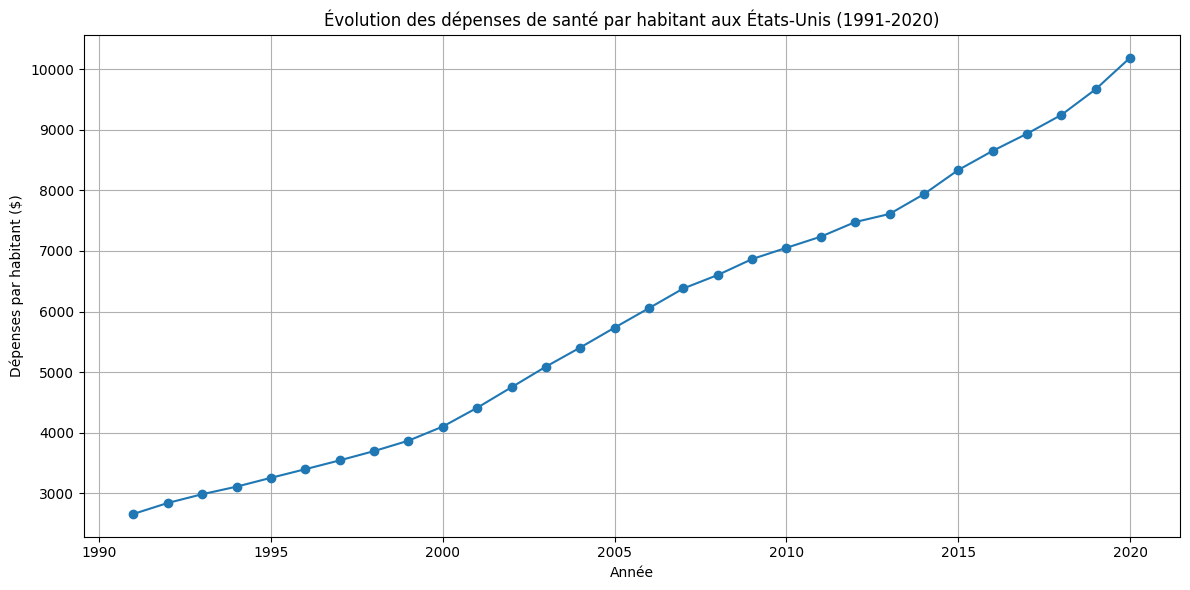

In [94]:
df_per_capita.rename(columns={"Region/state of residence": "State"}, inplace=True)
df_national = df_per_capita[df_per_capita["State"] == "United States"]

plt.figure(figsize=(12,6))
plt.plot(year_cols, df_national[year_cols].values.flatten(), marker="o")
plt.title("Évolution des dépenses de santé par habitant aux États-Unis (1991-2020)")
plt.xlabel("Année")
plt.ylabel("Dépenses par habitant ($)")
plt.grid(True)
plt.tight_layout()
plt.show()


Entre 1991 et 2020, les dépenses de santé par habitant aux États-Unis ont progressé de manière continue, passant d’environ 2 600 $ à, plus de 10 000 dollar.
La croissance s’accélère surtout après les années 2000, montrant une augmentation soutenue des coûts de santé sur les deux dernières décennies. Les dépenses ont presque quadruplé en 30 ans.

#### Dépenses de santé par habitant en 2020 (tous les États)

In [95]:
state_coords = pd.DataFrame({
    "State": [
        "Alabama","Alaska","Arizona","Arkansas","California","Colorado","Connecticut","Delaware","Florida","Georgia",
        "Hawaii","Idaho","Illinois","Indiana","Iowa","Kansas","Kentucky","Louisiana","Maine","Maryland",
        "Massachusetts","Michigan","Minnesota","Mississippi","Missouri","Montana","Nebraska","Nevada","New Hampshire","New Jersey",
        "New Mexico","New York","North Carolina","North Dakota","Ohio","Oklahoma","Oregon","Pennsylvania","Rhode Island","South Carolina",
        "South Dakota","Tennessee","Texas","Utah","Vermont","Virginia","Washington","West Virginia","Wisconsin","Wyoming"
    ],
    "latitude": [
        32.8067, 61.3707, 33.7298, 34.9697, 36.7783, 39.5501, 41.6032, 38.9108, 27.9944, 32.1656,
        21.0943, 44.2405, 40.6331, 40.2672, 42.0115, 39.0119, 37.8393, 30.9843, 45.2538, 39.0458,
        42.4072, 44.3148, 46.7296, 32.3547, 37.9643, 46.8797, 41.4925, 38.8026, 43.1939, 40.0583,
        34.5199, 43.0000, 35.7822, 47.5515, 40.4173, 35.0078, 43.8041, 41.2033, 41.5801, 33.8361,
        43.9695, 35.5175, 31.9686, 39.3200, 44.5588, 37.4316, 47.7511, 38.5976, 43.7844, 43.0759
    ],
    "longitude": [
        -86.7911, -152.4044, -111.4312, -92.3731, -119.4179, -105.7821, -73.0877, -75.5277, -81.7603, -82.9001,
        -157.4983, -114.4788, -89.3985, -86.1349, -93.2105, -98.4842, -84.2700, -91.9623, -69.4455, -76.6413,
        -71.3824, -85.6024, -94.6859, -89.3985, -91.8318, -110.3626, -99.9018, -116.4194, -71.5724, -74.4057,
        -105.8701, -75.0000, -80.7935, -101.0020, -82.9071, -97.0929, -120.5542, -77.1945, -71.4774, -81.1637,
        -99.9018, -86.6923, -99.9018, -111.0937, -72.5778, -78.6569, -120.7401, -80.4549, -88.7879, -107.2903
    ]
})


In [96]:
# Supprime "United States" car il n'existe pas sur la carte
df_states = df_per_capita[df_per_capita["State"] != "United States"]

# Fusionner
df_map = df_states.merge(state_coords, on="State")

In [97]:
fig = px.scatter_geo(
    df_map,
    lat="latitude",
    lon="longitude",
    size=2020,
    hover_name="State",
    projection="albers usa",
    title="Dépenses de santé par habitant en 2020 (tous les États)",
    size_max=40,
    color=2020,
    color_continuous_scale="Blues"
)

fig.show()

🔹 Évolution temporelle :
Entre 1991 et 2020, on observe une hausse généralisée des dépenses de santé par habitant dans l’ensemble des États-Unis.
Les montants ont quasiment quadruplé dans certains États

#### Dynamique temporelle par région

In [98]:
df_per_capita.rename(columns={"Region/state of residence": "State"}, inplace=True)

In [99]:
df_per_capita = pd.read_excel(
    file_path,
    sheet_name="Table 11 Personal Health Care",
    skiprows=1,
    header=0
)
df_per_capita.rename(columns={"Region/state of residence": "State"}, inplace=True)

In [100]:
# 1. Chargement des données macro
file_path = "Residence_all_tables.xlsx"
df_per_capita = pd.read_excel(
    file_path,
    sheet_name="Table 11 Personal Health Care",
    skiprows=1,
    header=0
)

# -----------------------------
# 2. Filtrer pour enlever la ligne 'United States'
df_states = df_per_capita[df_per_capita["Region/state of residence"] != "United States"]

# -----------------------------
# 3. Conversion wide -> long
year_cols = [col for col in df_states.columns if isinstance(col, int)]
df_long = df_states.melt(
    id_vars="Region/state of residence",
    value_vars=year_cols,
    var_name="Year",
    value_name="Spending"
)

# -----------------------------
# 4. Fusion avec les coordonnées
state_coords = pd.DataFrame({
    "Region/state of residence": [
        "Alabama","Alaska","Arizona","Arkansas","California","Colorado","Connecticut","Delaware","Florida","Georgia",
        "Hawaii","Idaho","Illinois","Indiana","Iowa","Kansas","Kentucky","Louisiana","Maine","Maryland",
        "Massachusetts","Michigan","Minnesota","Mississippi","Missouri","Montana","Nebraska","Nevada","New Hampshire","New Jersey",
        "New Mexico","New York","North Carolina","North Dakota","Ohio","Oklahoma","Oregon","Pennsylvania","Rhode Island","South Carolina",
        "South Dakota","Tennessee","Texas","Utah","Vermont","Virginia","Washington","West Virginia","Wisconsin","Wyoming"
    ],
    "latitude": [
        32.8067, 61.3707, 33.7298, 34.9697, 36.7783, 39.5501, 41.6032, 38.9108, 27.9944, 32.1656,
        21.0943, 44.2405, 40.6331, 40.2672, 42.0115, 39.0119, 37.8393, 30.9843, 45.2538, 39.0458,
        42.4072, 44.3148, 46.7296, 32.3547, 37.9643, 46.8797, 41.4925, 38.8026, 43.1939, 40.0583,
        34.5199, 43.0000, 35.7822, 47.5515, 40.4173, 35.0078, 43.8041, 41.2033, 41.5801, 33.8361,
        43.9695, 35.5175, 31.9686, 39.3200, 44.5588, 37.4316, 47.7511, 38.5976, 43.7844, 43.0759
    ],
    "longitude": [
        -86.7911, -152.4044, -111.4312, -92.3731, -119.4179, -105.7821, -73.0877, -75.5277, -81.7603, -82.9001,
        -157.4983, -114.4788, -89.3985, -86.1349, -93.2105, -98.4842, -84.2700, -91.9623, -69.4455, -76.6413,
        -71.3824, -85.6024, -94.6859, -89.3985, -91.8318, -110.3626, -99.9018, -116.4194, -71.5724, -74.4057,
        -105.8701, -75.0000, -80.7935, -101.0020, -82.9071, -97.0929, -120.5542, -77.1945, -71.4774, -81.1637,
        -99.9018, -86.6923, -99.9018, -111.0937, -72.5778, -78.6569, -120.7401, -80.4549, -88.7879, -107.2903
    ]
})

df_long = df_long.merge(state_coords, on="Region/state of residence")

# -----------------------------
# 5. Carte interactive avec animation
fig = px.scatter_geo(
    df_long,
    lat="latitude",
    lon="longitude",
    size="Spending",
    color="Spending",
    hover_name="Region/state of residence",
    animation_frame="Year",
    projection="albers usa",
    title="Évolution des dépenses de santé par habitant (1991-2020)",
    size_max=40,
    color_continuous_scale="Blues"
)

fig.show()


=> On constate que la dépense moyenne par habitant a fortement augmenté entre 1991 et 2020, avec des écarts géographiques importants. Les États du Nord-Est se distinguent par des niveaux de dépenses systématiquement plus élevés, tandis que d’autres régions, notamment le Sud, affichent des montants inférieurs. Cette hétérogénéité reflète des différences socio-économiques, démographiques et d’organisation des soins

#### Dynamique temporelle par région (GIF)

In [101]:
os.makedirs("frames", exist_ok=True)

years = sorted(df_long["Year"].unique())

filenames = []
for year in years:
    fig = plt.figure(figsize=(12, 8))
    ax = plt.axes(projection=ccrs.LambertConformal())

    ax.set_extent([-125, -66.5, 24, 50], crs=ccrs.Geodetic())

    # FOND BLANC
    fig.patch.set_facecolor("white")
    ax.set_facecolor("white")

    # PAS DE FOND GRIS (on n'ajoute pas LAND)
    ax.add_feature(cfeature.BORDERS, linestyle=':')
    ax.add_feature(cfeature.STATES, edgecolor='gray')
    ax.coastlines(resolution='50m')

    data_year = df_long[df_long["Year"] == year]

    scatter = ax.scatter(
        data_year["longitude"],
        data_year["latitude"],
        s=data_year["Spending"] / 5,
        c=data_year["Spending"],
        cmap="Blues",
        alpha=0.85,
        edgecolors="k",
        transform=ccrs.Geodetic()
    )

    plt.title(f"Dépenses de santé par habitant - {year}", fontsize=18)
    plt.colorbar(scatter, orientation="vertical", label="Spending ($)")

    filename = f"frames/frame_{year}.png"
    plt.savefig(filename, bbox_inches="tight", dpi=120)
    filenames.append(filename)
    plt.close()


In [102]:
with imageio.get_writer("health_spending_blues_slow.gif", mode="I", duration=2.0, loop=0) as writer:
    for filename in filenames:
        image = imageio.imread(filename)
        # Répète 4 fois la même image
        for _ in range(4):
            writer.append_data(image)

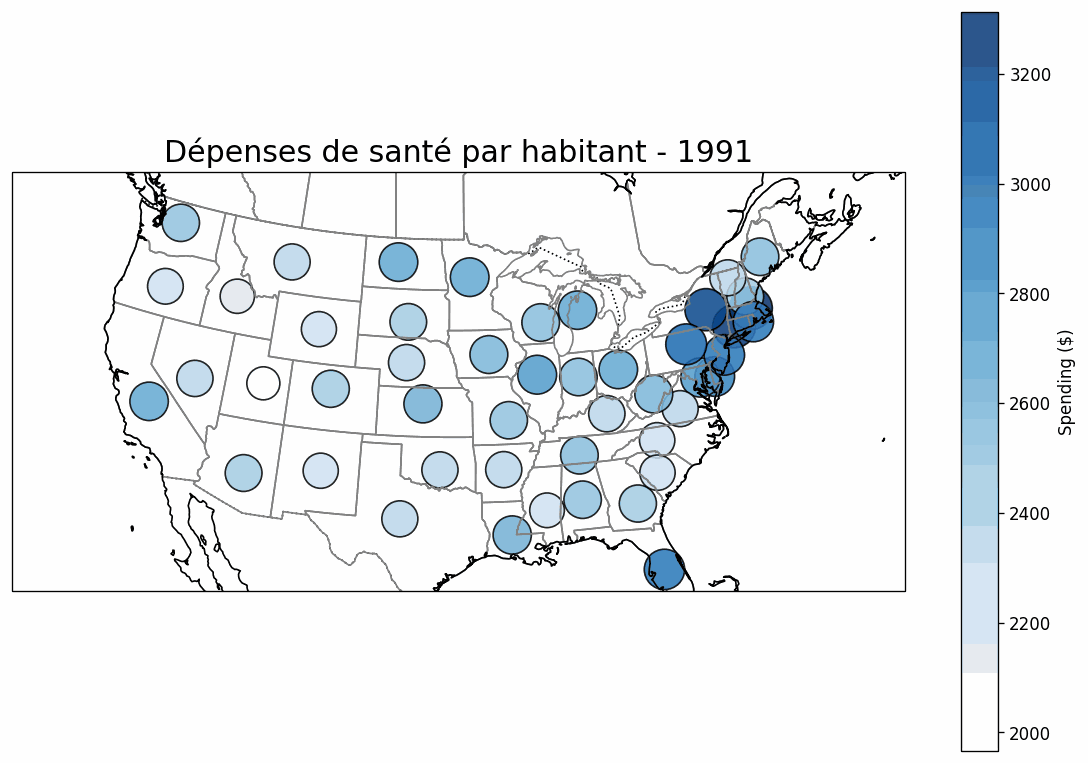

In [103]:
from IPython.display import Image
Image(filename="health_spending_blues_slow.gif")

Variabilité géographique :
Visuellement, la carte montre :
Les États du Nord-Est (ex. Massachusetts, New York) apparaissent régulièrement avec des couleurs plus foncées (dépenses plus élevées).
Les États du Sud et Midwest restent plus clairs, indiquant des niveaux de dépenses plus faibles.
La Californie et quelques États de l’Ouest montrent des montants intermédiaires mais en croissance régulière.

#### Classement des États par dépense moyenne

In [104]:
# Liste complète officielle
us_states = [
    "Alabama", "Alaska", "Arizona", "Arkansas", "California", "Colorado", "Connecticut",
    "Delaware", "District of Columbia", "Florida", "Georgia", "Hawaii", "Idaho", "Illinois",
    "Indiana", "Iowa", "Kansas", "Kentucky", "Louisiana", "Maine", "Maryland", "Massachusetts",
    "Michigan", "Minnesota", "Mississippi", "Missouri", "Montana", "Nebraska", "Nevada",
    "New Hampshire", "New Jersey", "New Mexico", "New York", "North Carolina", "North Dakota",
    "Ohio", "Oklahoma", "Oregon", "Pennsylvania", "Rhode Island", "South Carolina",
    "South Dakota", "Tennessee", "Texas", "Utah", "Vermont", "Virginia", "Washington",
    "West Virginia", "Wisconsin", "Wyoming"
]

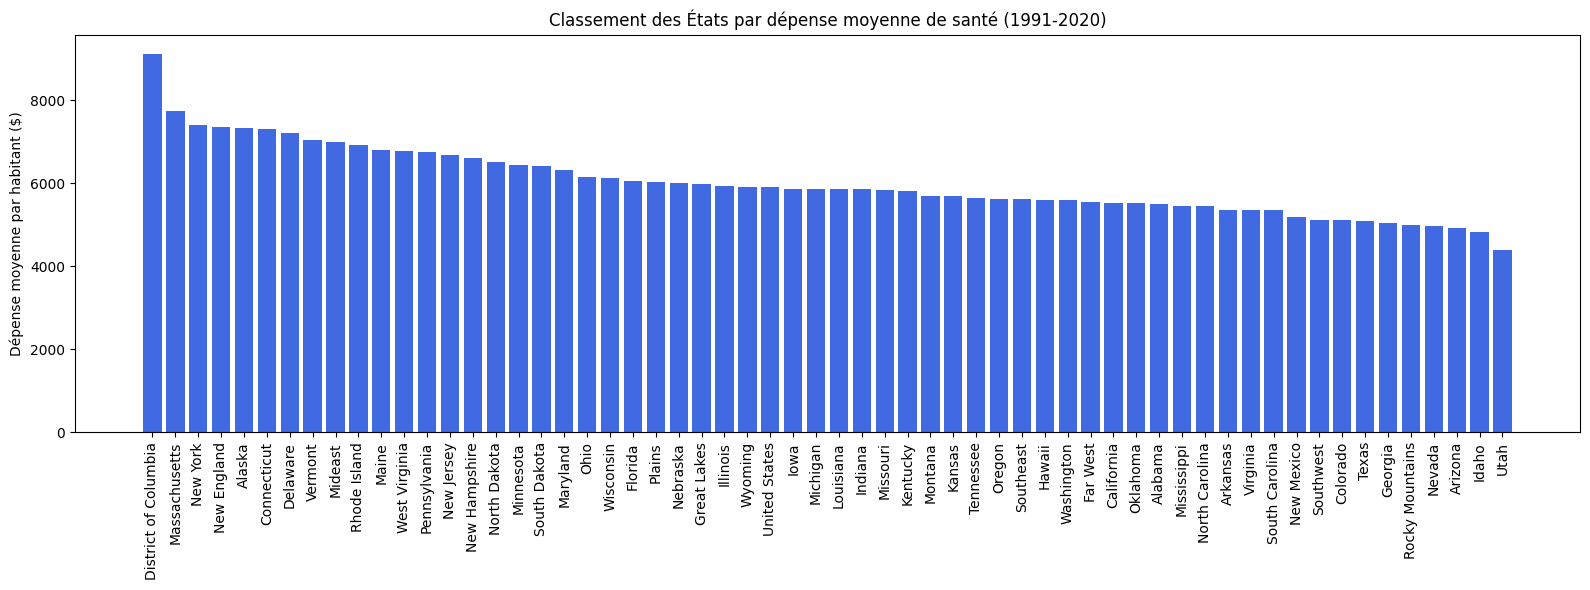

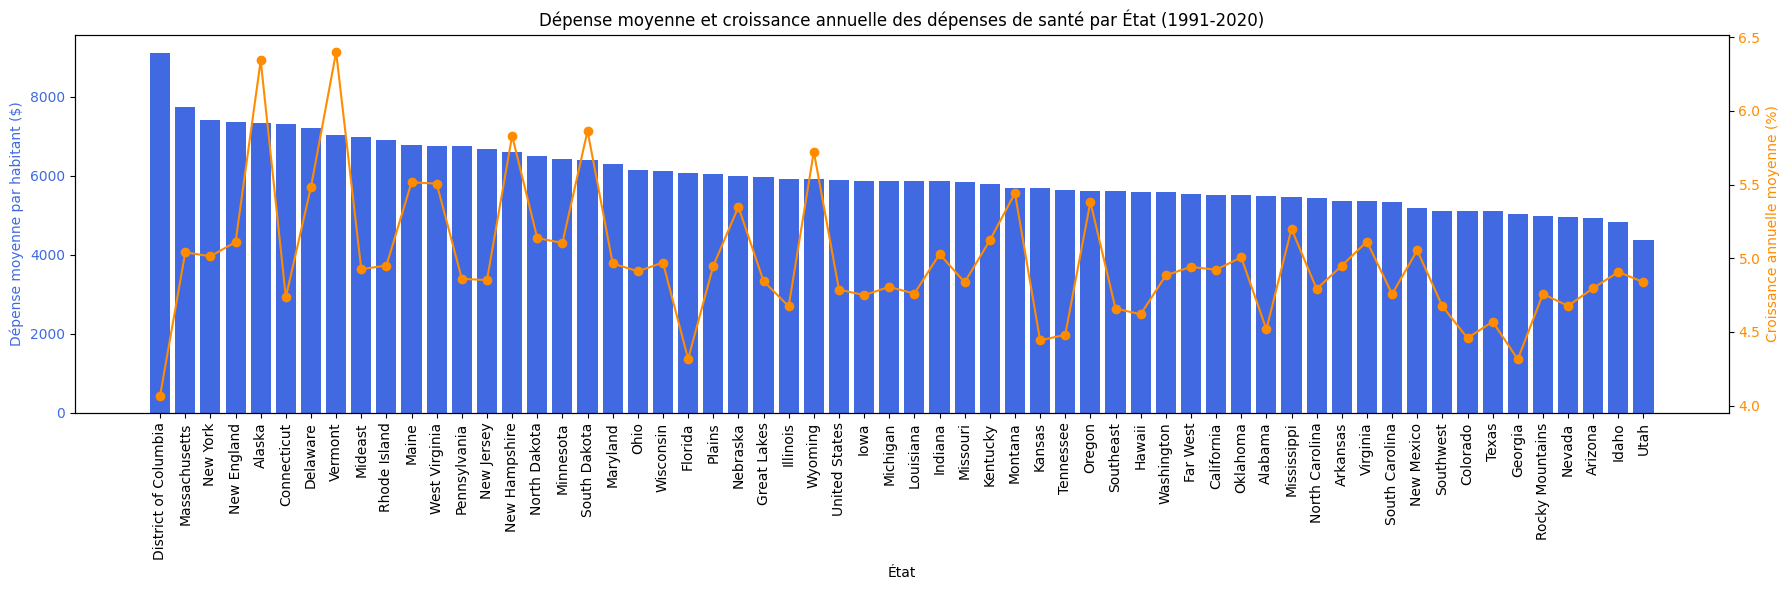

In [105]:
import pandas as pd
import numpy as np
from scipy.stats import linregress
import matplotlib.pyplot as plt

# 🧼 Renommage des colonnes si besoin
df_per_capita.rename(columns={"Region/state of residence": "State"}, inplace=True)
df_population.rename(columns={"Region/state of residence": "State"}, inplace=True)

# 🚫 Nettoyage des lignes parasites ou vides
for df in [df_per_capita, df_population]:
    df.dropna(subset=["State"], inplace=True)
    df = df[~df["State"].str.contains("numbers may not add to total", case=False, na=False)]

# 📅 Extraction des colonnes d'années
year_cols = [col for col in df_per_capita.columns if str(col).isdigit()]

# 📉 Format long (melt)
df_percapita_melt = df_per_capita.melt(id_vars="State", value_vars=year_cols, var_name="Year", value_name="Spending_per_capita")
df_population_melt = df_population.melt(id_vars="State", value_vars=year_cols, var_name="Year", value_name="Population")

# 🔀 Fusion
df_merged = pd.merge(df_percapita_melt, df_population_melt, on=["State", "Year"])
df_merged["Year"] = df_merged["Year"].astype(int)

# ➕ Dépense totale
df_merged["Total_Spending"] = df_merged["Spending_per_capita"] * df_merged["Population"]

# 🧮 Moyenne par État
average_spending = df_merged.groupby("State")["Spending_per_capita"].mean().reset_index()
average_spending.rename(columns={"Spending_per_capita": "Average_Spending"}, inplace=True)

# 📈 Croissance annuelle moyenne
growth_list = []
for state, group in df_merged.groupby("State"):
    group = group.sort_values("Year")
    x = group["Year"]
    y = group["Spending_per_capita"]
    if y.isnull().any() or (y <= 0).any():
        growth_list.append((state, np.nan))
    else:
        slope, _, _, _, _ = linregress(x, np.log(y))
        annual_growth = np.exp(slope) - 1
        growth_list.append((state, annual_growth))

df_growth = pd.DataFrame(growth_list, columns=["State", "Average_Annual_Growth"])

# 🔗 Fusion des résultats
df_states = pd.merge(average_spending, df_growth, on="State")
df_states.rename(columns={"Average_Annual_Growth": "Average\nAnnual %\nGrowth\n(1991-2020)"}, inplace=True)

# 🧽 Nettoyage final
df_states.dropna(subset=["Average\nAnnual %\nGrowth\n(1991-2020)"], inplace=True)
df_states["Average\nAnnual %\nGrowth\n(1991-2020)"] = df_states["Average\nAnnual %\nGrowth\n(1991-2020)"].astype(float) * 100

# 📋 Tri
df_sorted = df_states.sort_values(by="Average_Spending", ascending=False).reset_index(drop=True)

# 📊 GRAPHIQUE 1 – Barres seules
plt.figure(figsize=(16,6))
plt.bar(
    df_sorted["State"],
    df_sorted["Average_Spending"],
    color="royalblue"
)
plt.ylabel("Dépense moyenne par habitant ($)")
plt.xticks(rotation=90)
plt.title("Classement des États par dépense moyenne de santé (1991-2020)")
plt.tight_layout()
plt.show()

# 📊 GRAPHIQUE 2 – Barres + Ligne
fig, ax1 = plt.subplots(figsize=(18,6))

# Barres bleues
bars = ax1.bar(
    df_sorted["State"],
    df_sorted["Average_Spending"],
    color="royalblue"
)
ax1.set_ylabel("Dépense moyenne par habitant ($)", color="royalblue")
ax1.set_xlabel("État")
ax1.tick_params(axis='y', labelcolor="royalblue")
ax1.set_xticks(range(len(df_sorted)))
ax1.set_xticklabels(df_sorted["State"], rotation=90)

# Ligne orange : croissance annuelle
ax2 = ax1.twinx()
ax2.plot(
    range(len(df_sorted)),
    df_sorted["Average\nAnnual %\nGrowth\n(1991-2020)"],
    color="darkorange",
    marker="o"
)
ax2.set_ylabel("Croissance annuelle moyenne (%)", color="darkorange")
ax2.tick_params(axis='y', labelcolor="darkorange")

plt.title("Dépense moyenne et croissance annuelle des dépenses de santé par État (1991-2020)")
fig.tight_layout()
plt.show()

Interprétation du graphique – Classement des États par dépense moyenne de santé (1991–2020)

District of Columbia est de loin le territoire avec la dépense moyenne par habitant la plus élevée, dépassant 9 000 $, ce qui le place nettement au-dessus des autres États.
Les États comme Massachusetts, New York, New England, Alaska et Connecticut se situent également dans le haut du classement avec des dépenses supérieures à 7 000 dollar par habitant en moyenne.
À l’inverse, des États comme Utah, Idaho, Arizona et Nevada présentent les plus faibles dépenses moyennes (autour de 4 500–5 000 dollar).
On observe une variabilité importante entre les États, qui peut refléter des différences de coût de la vie, de niveau de revenus, de politiques de santé locales et de structure démographique.

#### Dépense moyenne et croissance annuelle des dépenses de santé par État (1991-2020)

KeyError: 'Region/state of residence'

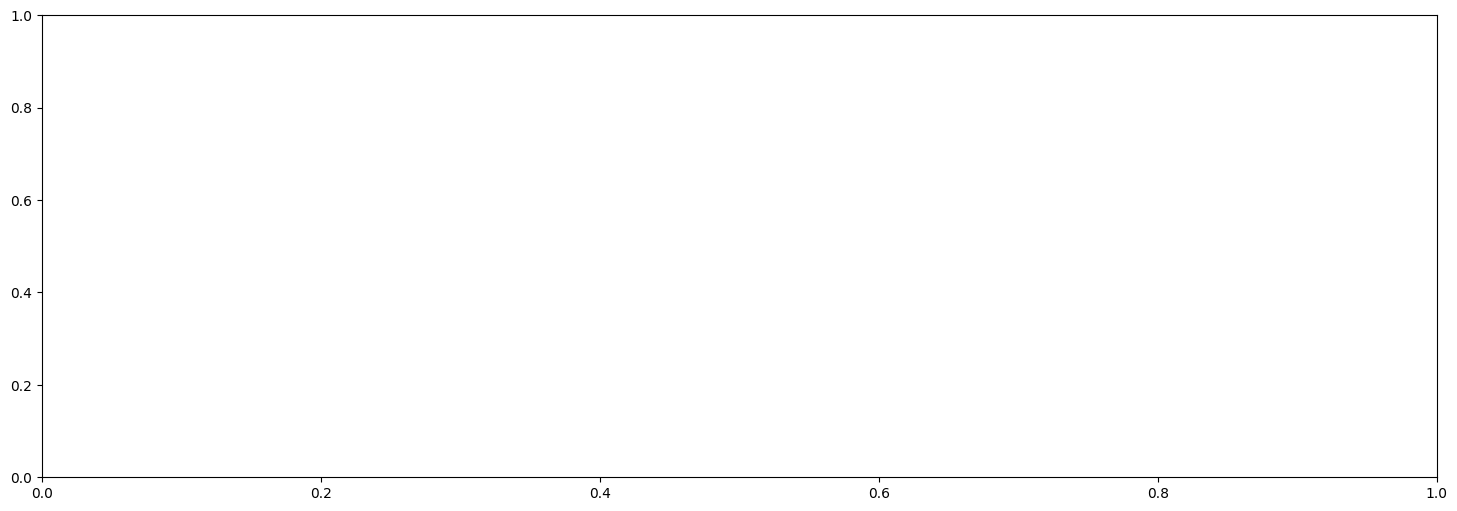

In [ ]:
fig, ax1 = plt.subplots(figsize=(18,6))

# Barres bleues : dépense moyenne
bars = ax1.bar(
    df_sorted["State"],
    df_sorted["Average_Spending"],
    color="royalblue"
)
ax1.set_ylabel("Dépense moyenne par habitant ($)", color="royalblue")
ax1.set_xlabel("État")
ax1.tick_params(axis='y', labelcolor="royalblue")
ax1.set_xticks(range(len(df_sorted)))
ax1.set_xticklabels(df_sorted["State"], rotation=90)

# Ligne orange : croissance annuelle
growth_col = "Average\nAnnual %\nGrowth\n(1991-2020)"
ax2 = ax1.twinx()
ax2.plot(
    range(len(df_sorted)),  # index numérique pour alignement avec les barres
    df_sorted[growth_col],
    color="darkorange",
    marker="o"
)
ax2.set_ylabel("Croissance annuelle moyenne (%)", color="darkorange")
ax2.tick_params(axis='y', labelcolor="darkorange")

plt.title("Dépense moyenne et croissance annuelle des dépenses de santé par État (1991-2020)")
fig.tight_layout()
plt.show()


✅ Les barres bleues (axe de gauche) montrent la dépense moyenne annuelle par habitant (1991–2020) pour chaque État.
➡️ On voit que :

Le District of Columbia et les États du Nord-Est (Massachusetts, New York) sont les plus dépensiers.

Les États de l’Ouest et du Sud (Utah, Idaho, Arizona) dépensent beaucoup moins en moyenne.

✅ La courbe orange (axe de droite) montre la croissance annuelle moyenne des dépenses sur la même période.
➡️ On remarque que :

Certains États avec une faible dépense moyenne (ex: Utah, Idaho) ont tout de même une croissance assez soutenue.

D’autres États très dépensiers (ex: New York, Massachusetts) n’ont pas forcément la croissance la plus forte.

Les variations sont parfois surprenantes (certains États peu dépensiers croissent vite, d’autres riches croissent moins).

Conclusion intéressante :

💡 Il n’y a pas toujours de lien direct entre le niveau de dépense et sa croissance.
Autrement dit : les États les plus riches ne sont pas forcément ceux dont les dépenses augmentent le plus vite.

In [ ]:
import pandas as pd

# Chargement
file_path = "Residence_all_tables.xlsx"

df_per_capita = pd.read_excel(file_path, sheet_name="Table 11 Personal Health Care", skiprows=1)
df_population = pd.read_excel(file_path, sheet_name="Table 21 Population", skiprows=1)

# Renommage des colonnes
df_per_capita.rename(columns={"Region/state of residence": "State"}, inplace=True)
df_population.rename(columns={"Region/state of residence": "State"}, inplace=True)

# Suppression de la ligne 'United States' si elle existe
df_per_capita = df_per_capita[df_per_capita["State"] != "United States"]
df_population = df_population[df_population["State"] != "United States"]

# Liste des colonnes années
year_cols = [col for col in df_per_capita.columns if isinstance(col, int)]
year_cols_str = [str(year) for year in year_cols]

# Conversion colonnes population en string
df_population.columns = ["State"] + [str(c) if isinstance(c, int) else c for c in df_population.columns[1:]]
df_per_capita.columns = ["State"] + [str(c) if isinstance(c, int) else c for c in df_per_capita.columns[1:]]


In [ ]:
# Conversion en format long
df_percapita_melt = df_per_capita.melt(id_vars="State", value_vars=year_cols_str, var_name="Year", value_name="Spending_per_capita")
df_population_melt = df_population.melt(id_vars="State", value_vars=year_cols_str, var_name="Year", value_name="Population")

# Fusion
df_merged = pd.merge(df_percapita_melt, df_population_melt, on=["State", "Year"])

# Calcul dépense totale
df_merged["Total_Spending"] = df_merged["Spending_per_capita"] * df_merged["Population"]

# Tri
df_merged.sort_values(by=["State", "Year"], inplace=True)

# Aperçu
df_merged.head()


NameError: name 'df_per_capita' is not defined

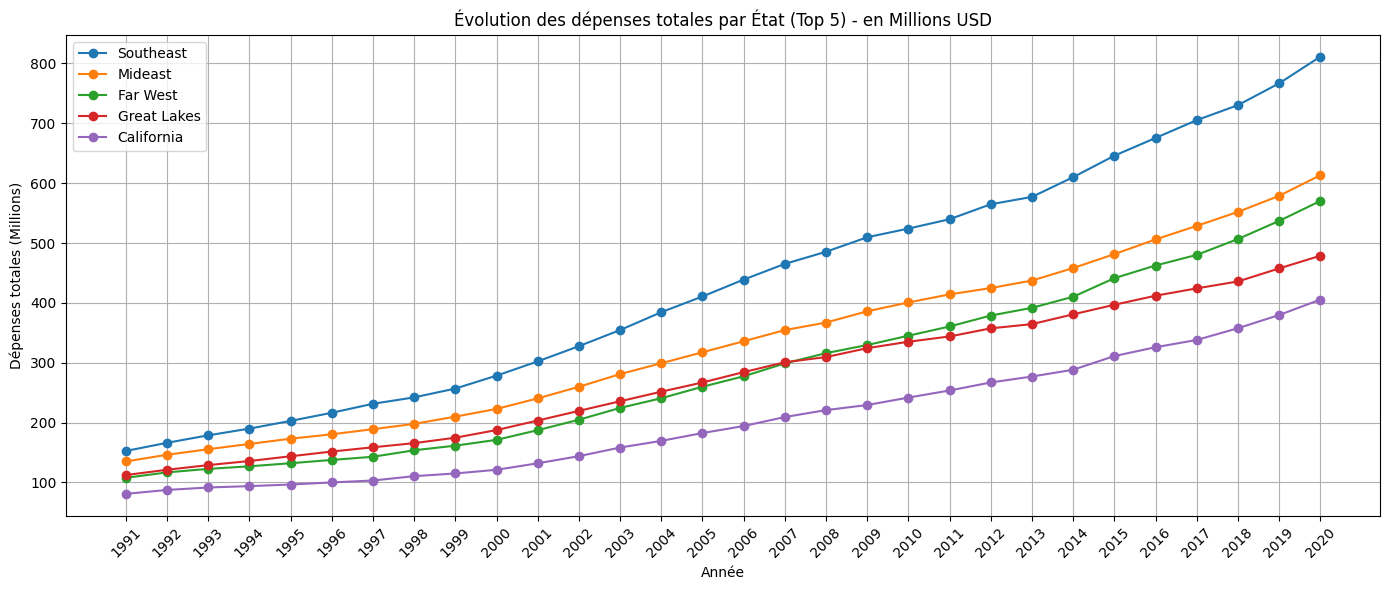

In [ ]:
import matplotlib.pyplot as plt

# États avec la plus grosse dépense totale en 2020
top_states = df_merged[df_merged["Year"] == "2020"].sort_values(by="Total_Spending", ascending=False).head(5)["State"].tolist()

plt.figure(figsize=(14,6))

for state in top_states:
    data = df_merged[df_merged["State"] == state]
    plt.plot(data["Year"], data["Total_Spending"]/1e6, marker="o", label=state)

plt.title("Évolution des dépenses totales par État (Top 5) - en Millions USD")
plt.xlabel("Année")
plt.ylabel("Dépenses totales (Millions)")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
# Supprimer les lignes avec des notes
df_merged = df_merged[~df_merged["State"].str.contains("NOTE|SOURCE", na=False)]


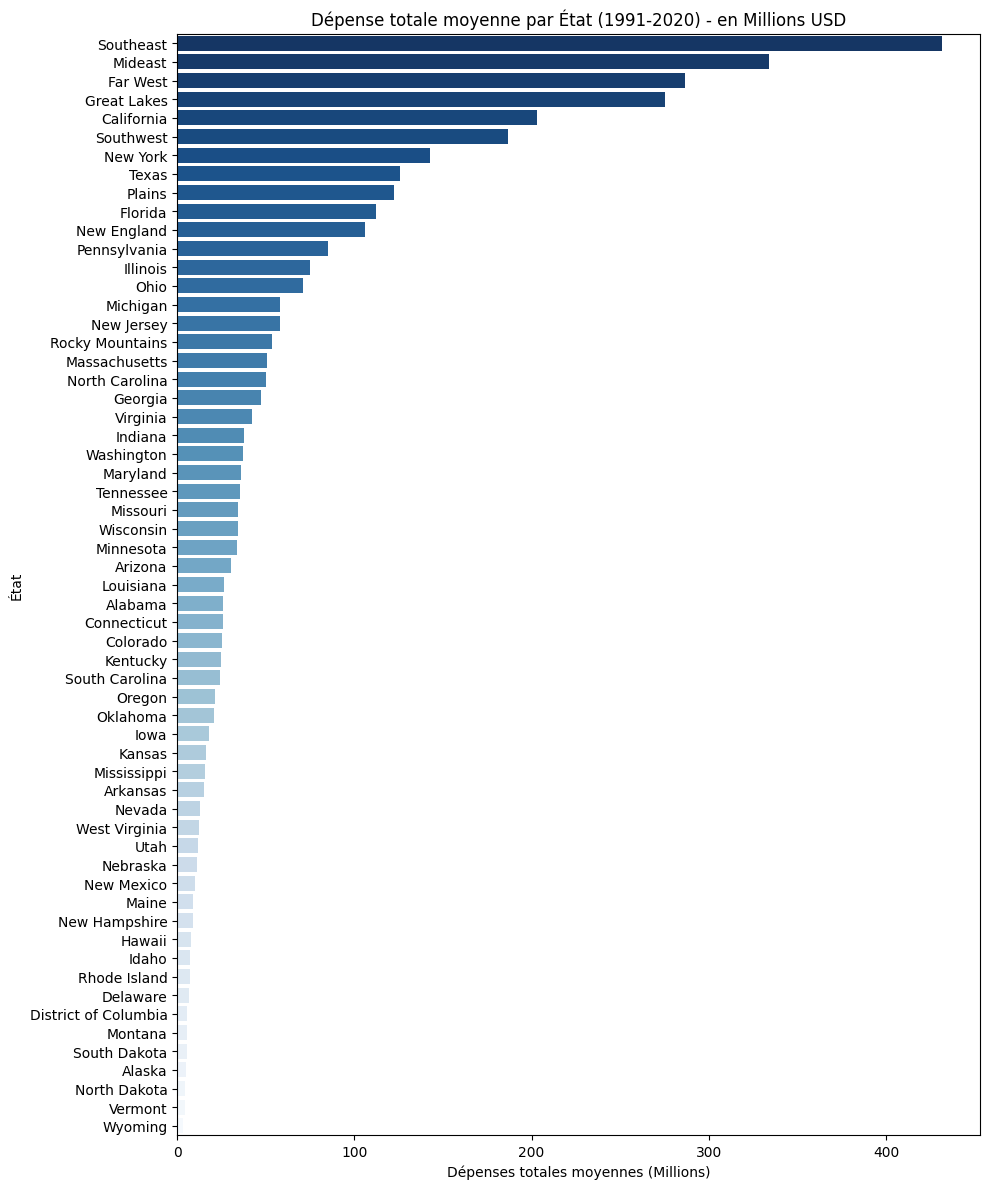

In [ ]:
# Moyenne des dépenses totales par État
avg_total = df_merged.groupby("State")["Total_Spending"].mean().sort_values(ascending=False)

plt.figure(figsize=(10,12))
sns.barplot(x=avg_total.values/1e6, y=avg_total.index, palette="Blues_r")

plt.title("Dépense totale moyenne par État (1991-2020) - en Millions USD")
plt.xlabel("Dépenses totales moyennes (Millions)")
plt.ylabel("État")
plt.tight_layout()
plt.show()


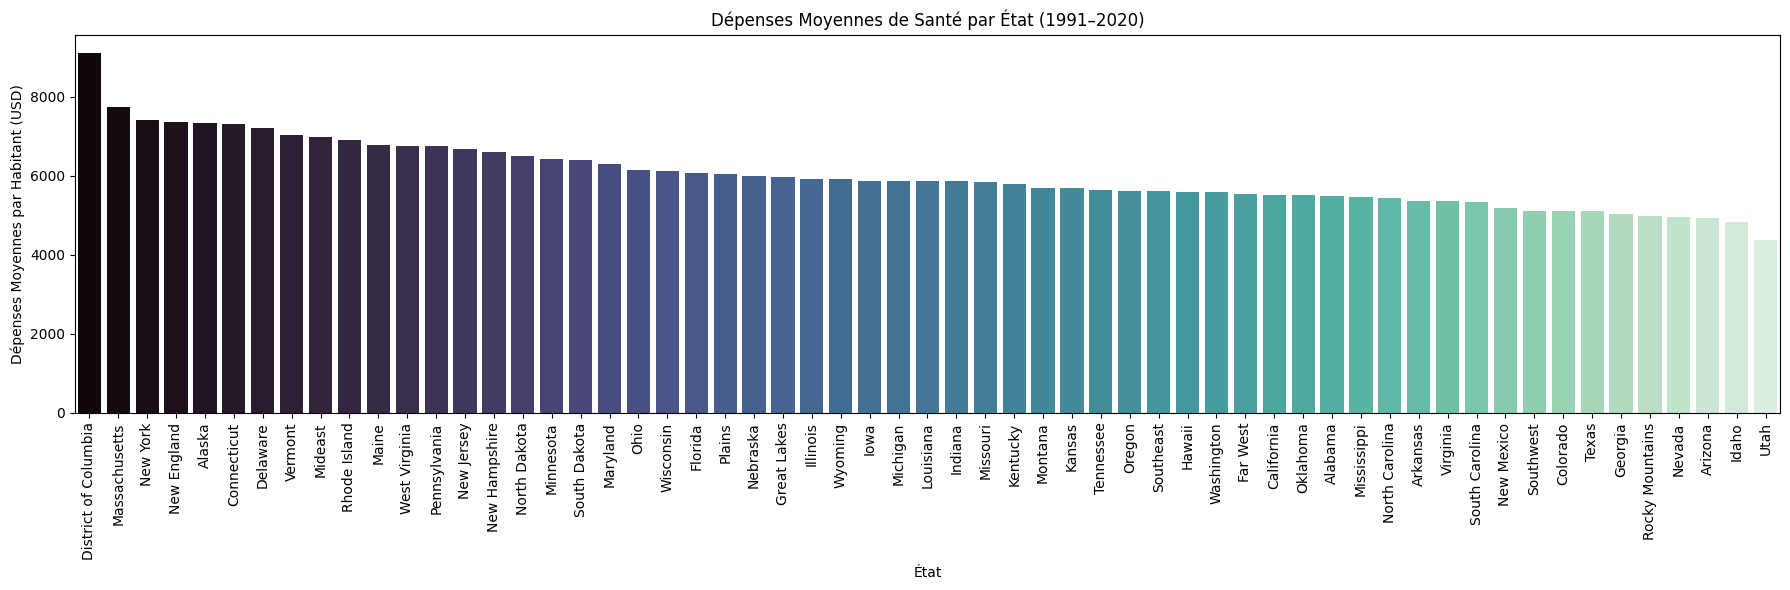

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Tri décroissant : les plus chers à droite
sorted_df = df_states.sort_values(by="Average_Spending", ascending=False)

plt.figure(figsize=(18, 6))

# Barplot avec palette "mako" (du clair au foncé)
ax = sns.barplot(
    x="Region/state of residence",
    y="Average_Spending",
    data=sorted_df,
    palette="mako"
)

# Labels et titre
ax.set_ylabel("Dépenses Moyennes par Habitant (USD)")
ax.set_xlabel("État")
ax.set_title("Dépenses Moyennes de Santé par État (1991–2020)")

# Rotation des noms d'états
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()


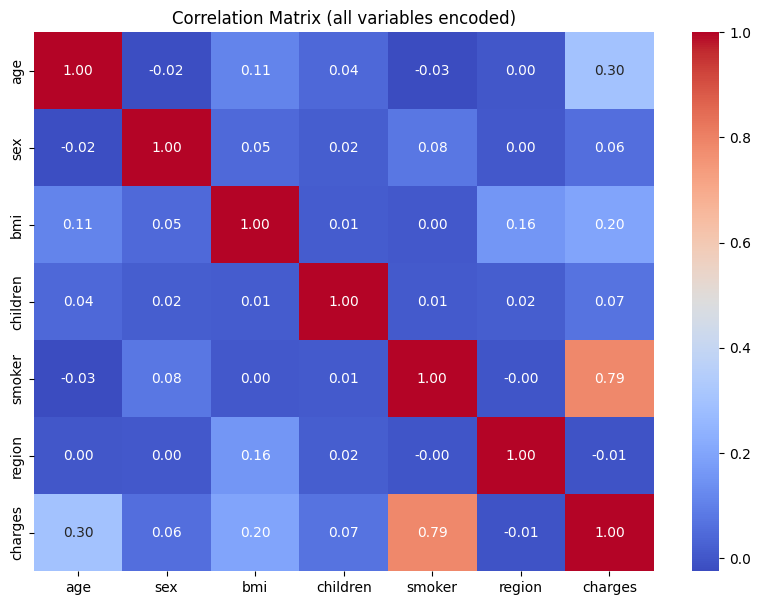

Correlation of each variable with charges:
charges     1.000000
smoker      0.787251
age         0.299008
bmi         0.198341
children    0.067998
sex         0.057292
region     -0.006208
Name: charges, dtype: float64


In [ ]:
df_encoded = df.copy()
for col in df_encoded.select_dtypes(include=['object']).columns:
    df_encoded[col] = df_encoded[col].astype('category').cat.codes

corr = df_encoded.corr()

plt.figure(figsize=(10, 7))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix (all variables encoded)')
plt.show()

print("Correlation of each variable with charges:")
corr_with_charges = corr['charges'].sort_values(ascending=False)
print(corr_with_charges)

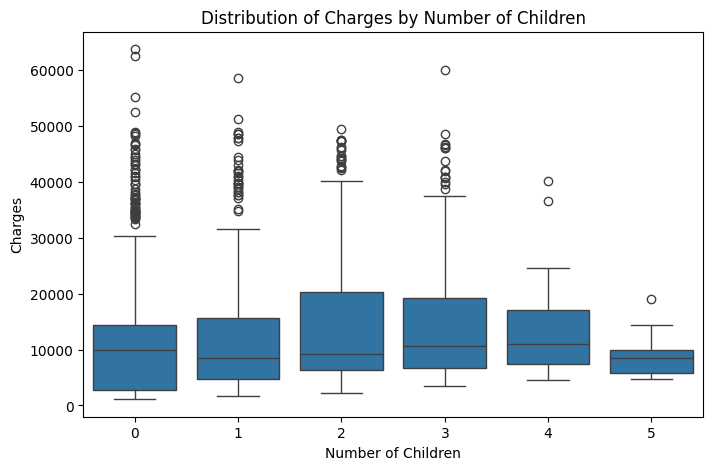

Correlation of chidlren with charges:
0.06799822684790469


In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='children', y='charges', data=df)
plt.title('Distribution of Charges by Number of Children')
plt.xlabel('Number of Children')
plt.ylabel('Charges')
plt.show()

print("Correlation of chidlren with charges:")
print(df_encoded['children'].corr(df_encoded['charges']))

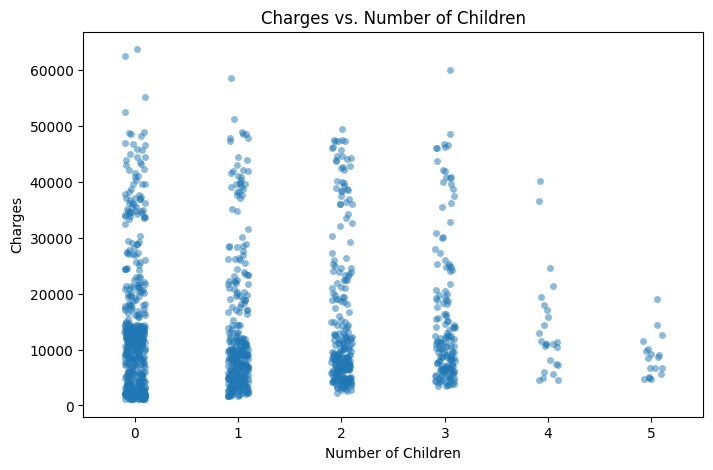

In [ ]:
plt.figure(figsize=(8, 5))
sns.stripplot(x='children', y='charges', data=df, jitter=True, alpha=0.5)
plt.title('Charges vs. Number of Children')
plt.xlabel('Number of Children')
plt.ylabel('Charges')
plt.show()

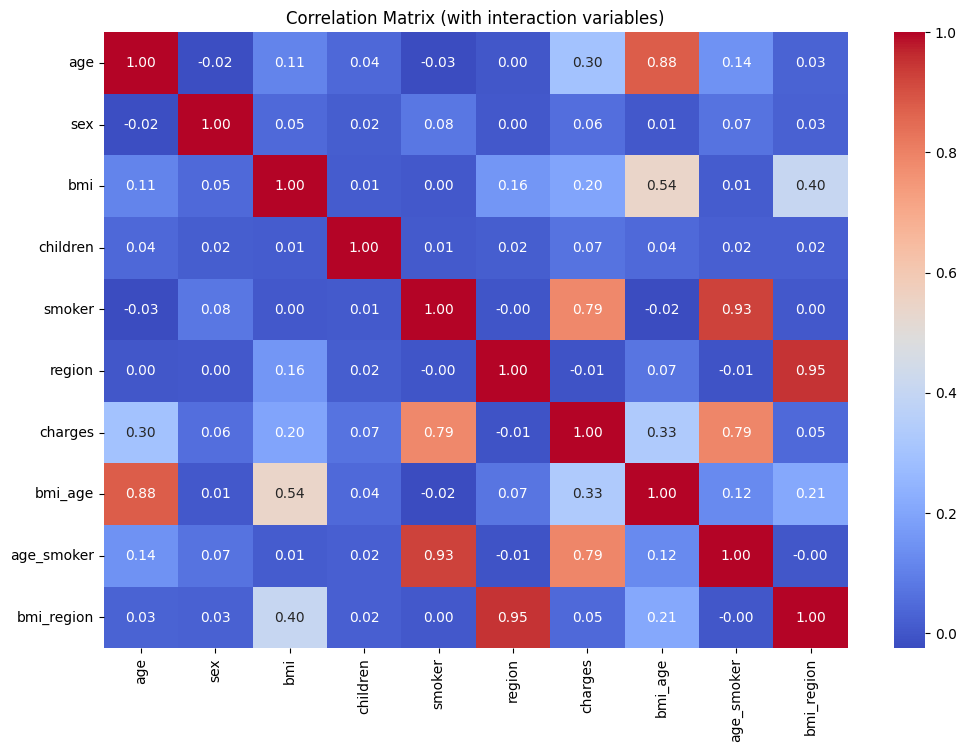

Correlation of each variable with charges:
charges       1.000000
age_smoker    0.789253
smoker        0.787251
bmi_age       0.334754
age           0.299008
bmi           0.198341
children      0.067998
sex           0.057292
bmi_region    0.045619
region       -0.006208
Name: charges, dtype: float64


In [ ]:
df_encoded = df.copy()

for col in df_encoded.select_dtypes(include=['object']).columns:
    df_encoded[col] = df_encoded[col].astype('category').cat.codes

df_encoded['bmi_age'] = df_encoded['bmi'] * df_encoded['age']
df_encoded['age_smoker'] = df_encoded['age'] * df_encoded['smoker']
df_encoded['bmi_region'] = df_encoded['bmi'] * df_encoded['region'] 

corr = df_encoded.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix (with interaction variables)')
plt.show()
print("Correlation of each variable with charges:")
corr_with_charges = corr['charges'].sort_values(ascending=False)
print(corr_with_charges)

Correlation of each variable with charges:
charges       1.000000
age_smoker    0.789253
smoker        0.787251
bmi_age       0.334754
age           0.299008
bmi           0.198341
children      0.067998
sex           0.057292
bmi_region    0.045619
region       -0.006208
Name: charges, dtype: float64


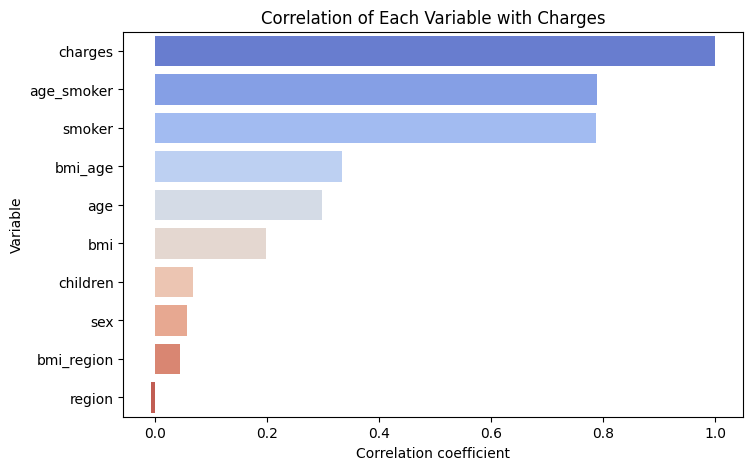

In [ ]:

corr_with_charges = corr['charges'].sort_values(ascending=False)
print("Correlation of each variable with charges:")
print(corr_with_charges)

plt.figure(figsize=(8, 5))
sns.barplot(x=corr_with_charges.values, y=corr_with_charges.index, palette='coolwarm')
plt.title('Correlation of Each Variable with Charges')
plt.xlabel('Correlation coefficient')
plt.ylabel('Variable')
plt.show()

Top 20 correlations with charges (excluding interactions with charges):
charges                   1.000000
bmi_smoker                0.845120
age_bmi_smoker            0.838459
age_smoker                0.789253
smoker                    0.787251
bmi_smoker_region         0.691293
age_smoker_region         0.660258
smoker_region             0.649403
sex_bmi_smoker            0.636201
age_sex_smoker            0.603521
sex_smoker                0.599792
bmi_children_smoker       0.574007
age_children_smoker       0.535580
children_smoker           0.524875
sex_smoker_region         0.503165
sex_children_smoker       0.428792
children_smoker_region    0.421403
age_bmi                   0.334754
age                       0.299008
bmi                       0.198341
Name: charges, dtype: float64


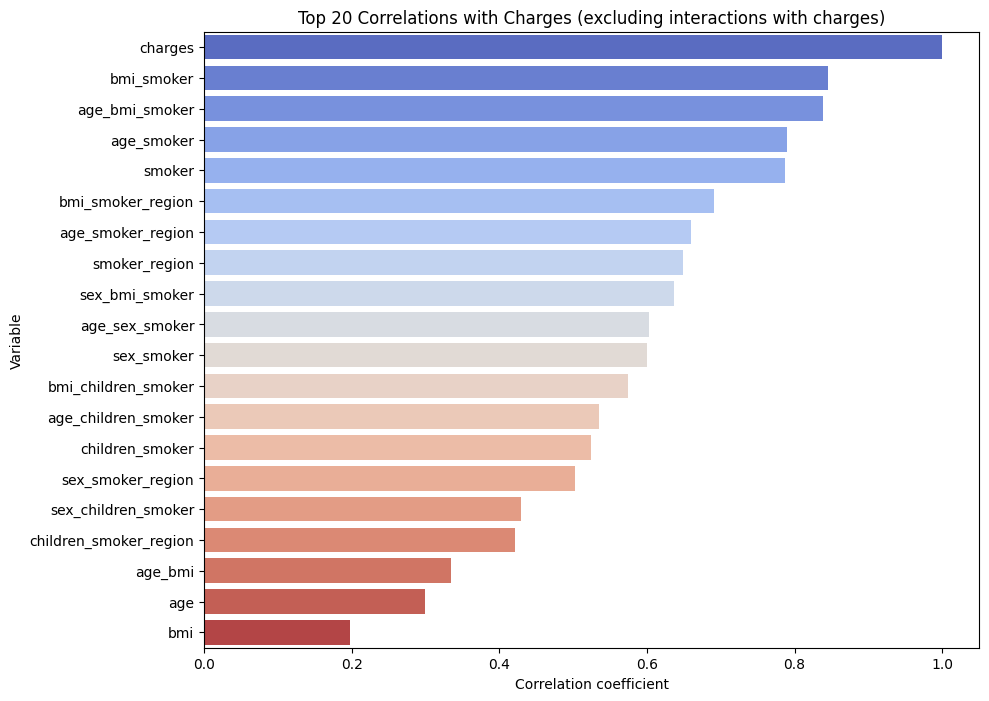

In [ ]:
df_encoded = df.copy()
for col in df_encoded.select_dtypes(include=['object']).columns:
    df_encoded[col] = df_encoded[col].astype('category').cat.codes


features = [col for col in df_encoded.columns if col != 'charges']


for comb in combinations(features, 2):
    name = f"{comb[0]}_{comb[1]}"
    df_encoded[name] = df_encoded[comb[0]] * df_encoded[comb[1]]
    
for comb in combinations(features, 3):
    name = f"{comb[0]}_{comb[1]}_{comb[2]}"
    df_encoded[name] = df_encoded[comb[0]] * df_encoded[comb[1]] * df_encoded[comb[2]]

corr = df_encoded.corr()
corr_with_charges = corr['charges'].sort_values(ascending=False)
print("Top 20 correlations with charges (excluding interactions with charges):")
print(corr_with_charges.head(20))

plt.figure(figsize=(10, 8))
sns.barplot(x=corr_with_charges.head(20).values, y=corr_with_charges.head(20).index, palette='coolwarm')
plt.title('Top 20 Correlations with Charges (excluding interactions with charges)')
plt.xlabel('Correlation coefficient')
plt.ylabel('Variable')
plt.show()

Average charges by region: region
southeast    14735.411438
northeast    13406.384516
northwest    12417.575374
southwest    12346.937377
Name: charges, dtype: float64


<Axes: xlabel='region'>

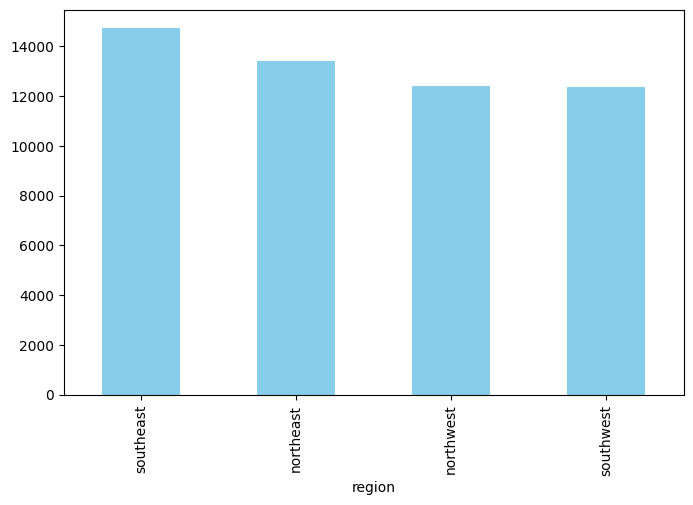

In [ ]:
charges_by_region = df.groupby('region')['charges'].mean().sort_values(ascending=False)
print("Average charges by region:",charges_by_region)
plt.figure(figsize=(8, 5))
charges_by_region.plot(kind='bar', color='skyblue') 

Average charges for smokers vs non-smokers: smoker
no      8434.268298
yes    32050.231832
Name: charges, dtype: float64


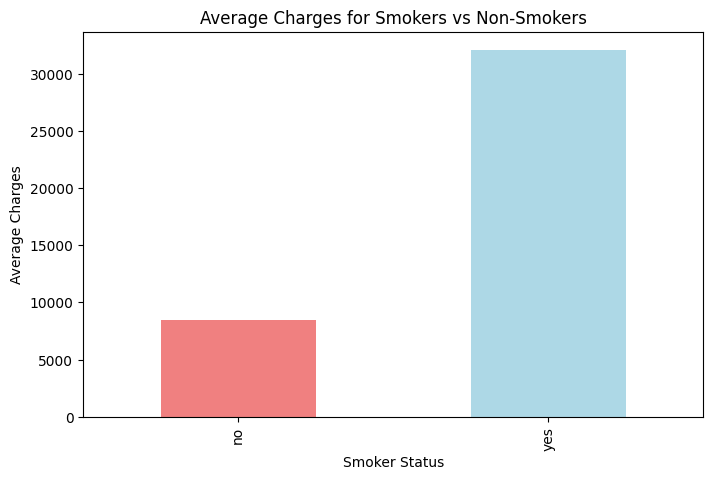

In [ ]:
smoker_vs_nonsmoker = df.groupby('smoker')['charges'].mean()
print("Average charges for smokers vs non-smokers:", smoker_vs_nonsmoker)
plt.figure(figsize=(8, 5))
smoker_vs_nonsmoker.plot(kind='bar', color=['lightcoral', 'lightblue'])
plt.title('Average Charges for Smokers vs Non-Smokers')
plt.xlabel('Smoker Status')
plt.ylabel('Average Charges')
plt.show()

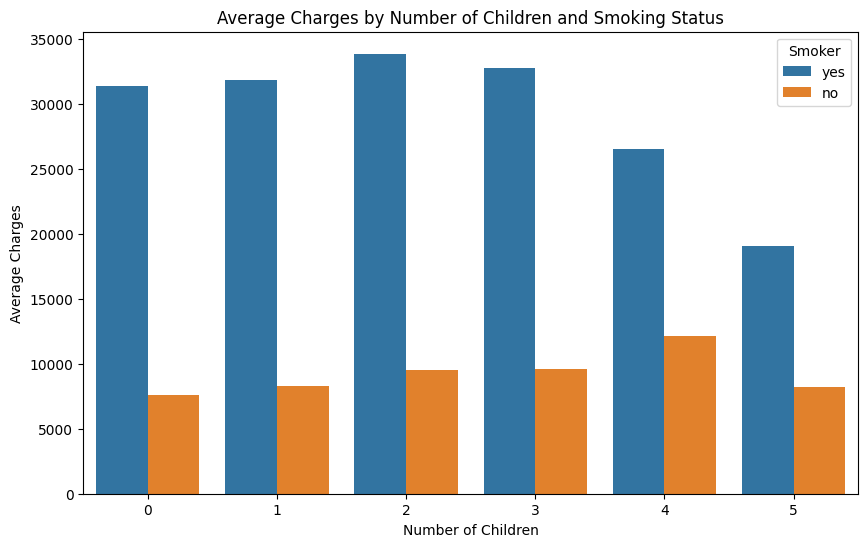

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='children', y='charges', hue='smoker', data=df, ci=None)
plt.title('Average Charges by Number of Children and Smoking Status')
plt.xlabel('Number of Children')
plt.ylabel('Average Charges')
plt.legend(title='Smoker')
plt.show()



Total charges paid by non-smoking families by number of children: children
0    3.493813e+06
1    2.183718e+06
2    1.756222e+06
3    1.134513e+06
4    2.666696e+05
5    1.391254e+05
Name: charges, dtype: float64


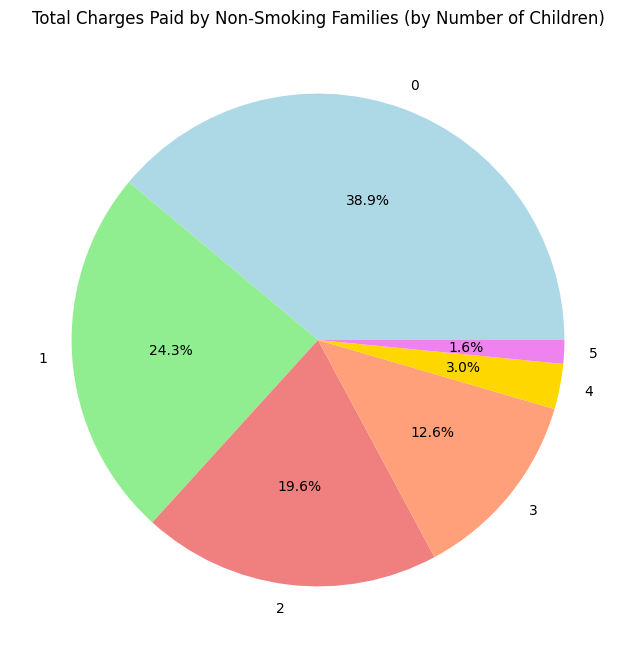

In [ ]:
# Sum of charges for non-smoking families by number of children
charges_by_children = df[df['smoker'] == 'no'].groupby('children')['charges'].sum().sort_index()
print("Total charges paid by non-smoking families by number of children:", charges_by_children)

charges_by_children.plot(
    kind='pie',
    autopct='%1.1f%%',
    figsize=(8, 8),
    colors=['lightblue', 'lightgreen', 'lightcoral', 'lightsalmon', 'gold', 'violet']
)
plt.title('Total Charges Paid by Non-Smoking Families (by Number of Children)')
plt.ylabel('')
plt.show()

Distribution of charges for non-smokers: Series([], Name: count, dtype: int64)


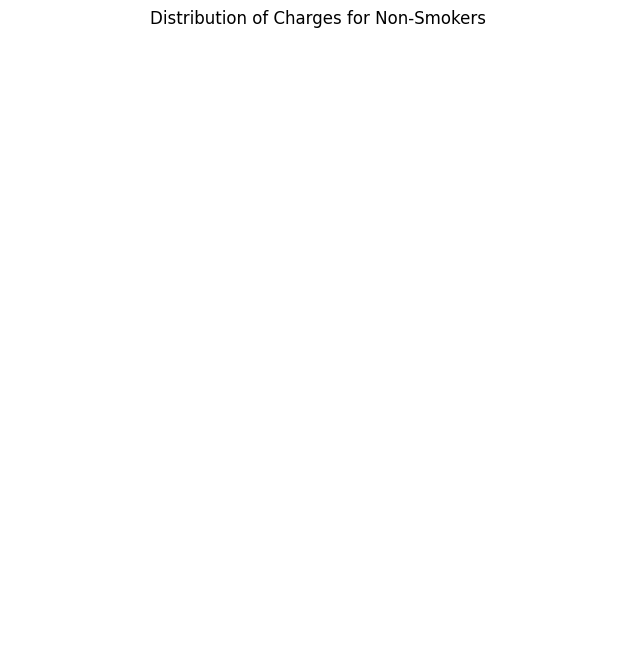

smoker     no  yes
children          
0         459  115
1         263   61
2         185   55
3         118   39
4          22    3
5          17    1


In [ ]:
non_smoker_charges_pie = df[df['smoker'] == 0]['charges'].value_counts()
print("Distribution of charges for non-smokers:", non_smoker_charges_pie)
non_smoker_charges_pie.plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8), colors=['lightblue', 'lightgreen', 'lightcoral', 'lightsalmon'])
plt.title('Distribution of Charges for Non-Smokers')
plt.ylabel('')
plt.show()
smoker_counts = df.groupby(['children', 'smoker']).size().unstack(fill_value=0)
print(smoker_counts)

smoker     no  yes
children          
0         459  115
1         263   61
2         185   55
3         118   39
4          22    3
5          17    1


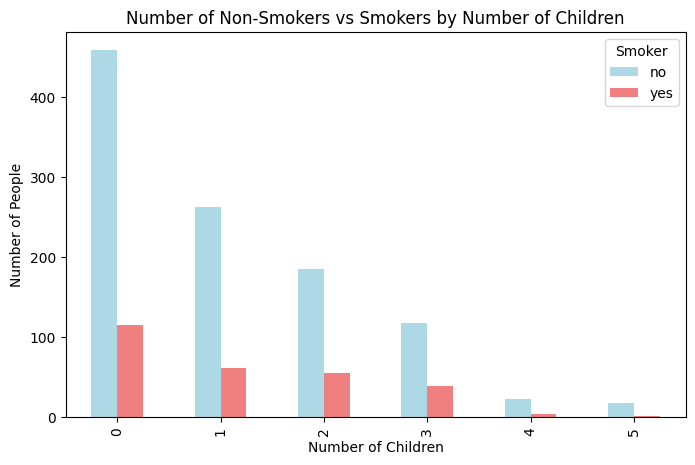

In [ ]:
smoker_counts = df.groupby(['children', 'smoker']).size().unstack(fill_value=0)

print(smoker_counts)

smoker_counts.plot(kind='bar', stacked=False, figsize=(8, 5), color=['lightblue', 'lightcoral'])
plt.title('Number of Non-Smokers vs Smokers by Number of Children')
plt.xlabel('Number of Children')
plt.ylabel('Number of People')
plt.legend(title='Smoker')
plt.show()

In [ ]:
four_children_family = df[df['children'] == 1].count()
print("Families with 4 children:")
print(four_children_family)

Families with 4 children:
age         324
sex         324
bmi         324
children    324
smoker      324
region      324
charges     324
dtype: int64


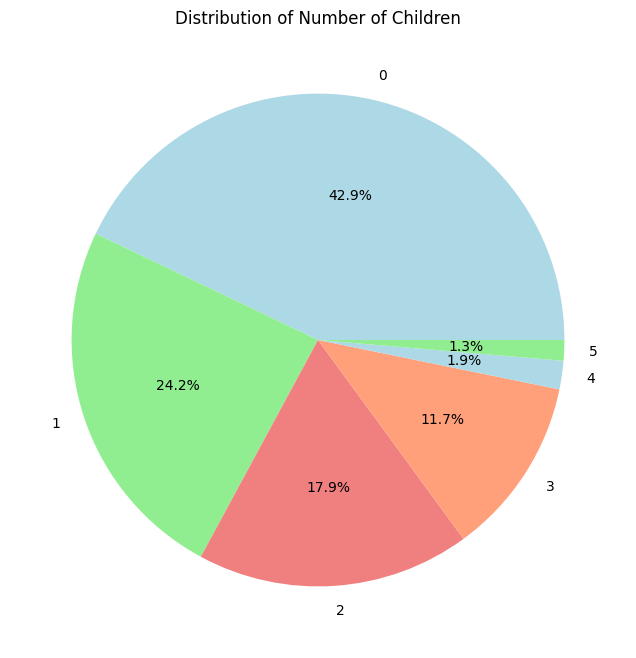

In [ ]:
children_pie_chart = df['children'].value_counts()
children_pie_chart.plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8), colors=['lightblue', 'lightgreen', 'lightcoral', 'lightsalmon'])
plt.title('Distribution of Number of Children')
plt.ylabel('')
plt.show()

Average BMI by number of children: children
4    31.391200
2    30.978104
3    30.684331
1    30.623148
0    30.550296
5    29.605000
Name: bmi, dtype: float64


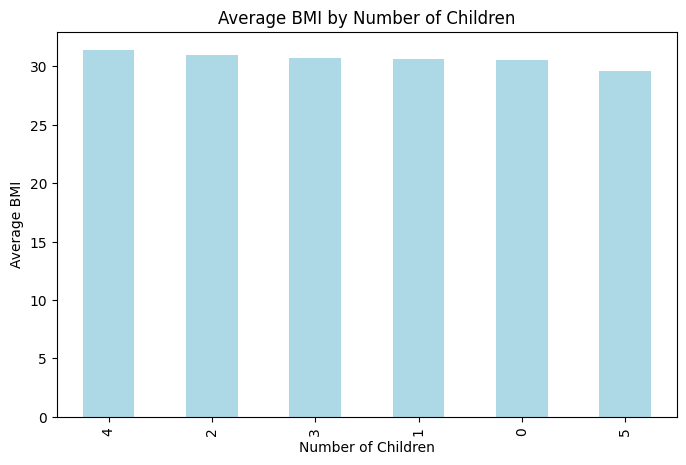

In [ ]:
bmi_children = df.groupby('children')['bmi'].mean().sort_values(ascending=False)
print("Average BMI by number of children:", bmi_children)
plt.figure(figsize=(8, 5))
bmi_children.plot(kind='bar', color='lightblue')
plt.title('Average BMI by Number of Children')
plt.xlabel('Number of Children')
plt.ylabel('Average BMI')
plt.show()

Average number of children by region: region
northwest    1.147692
southwest    1.141538
southeast    1.049451
northeast    1.046296
Name: children, dtype: float64


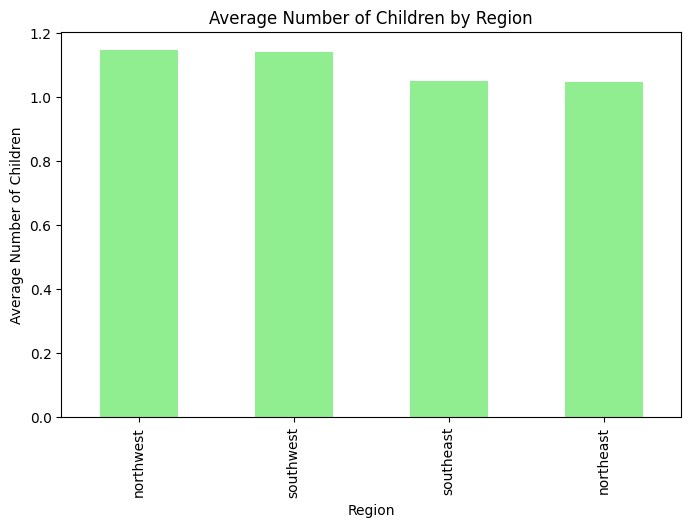

In [ ]:
children_by_region = df.groupby('region')['children'].mean().sort_values(ascending=False)
print("Average number of children by region:", children_by_region)
plt.figure(figsize=(8, 5))
children_by_region.plot(kind='bar', color='lightgreen')
plt.title('Average Number of Children by Region')
plt.xlabel('Region')
plt.ylabel('Average Number of Children')
plt.show()

Average charges for smokers by BMI: Series([], Name: charges, dtype: float64)


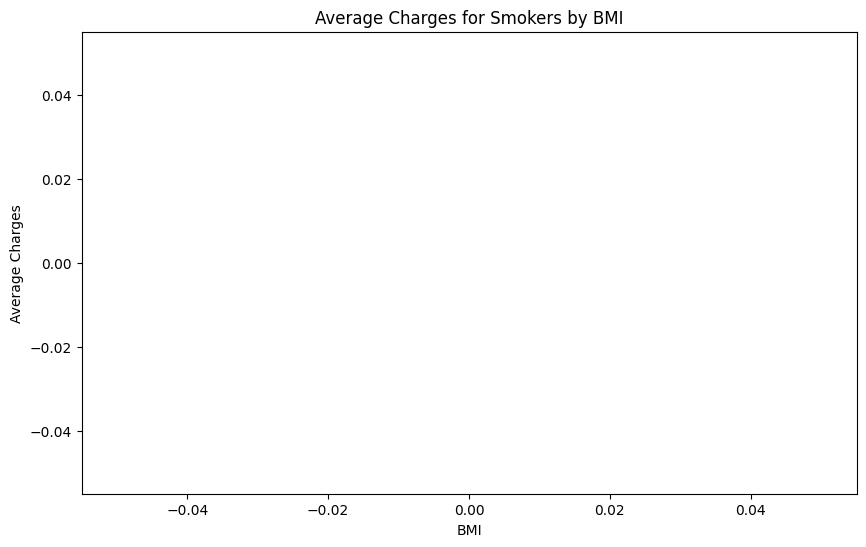

In [ ]:
smoker_bmi_charges = df[df['smoker'] == 1].groupby('bmi')['charges'].mean().sort_index()
print("Average charges for smokers by BMI:", smoker_bmi_charges)
plt.figure(figsize=(10, 6))
smoker_bmi_charges.plot(kind='line', color='lightcoral')
plt.title('Average Charges for Smokers by BMI')
plt.xlabel('BMI')
plt.ylabel('Average Charges')
plt.show()

On observe que smoker est tres correle avec charges. Nous allons etablir l'hypothese que être fumeur genere plus de charges.

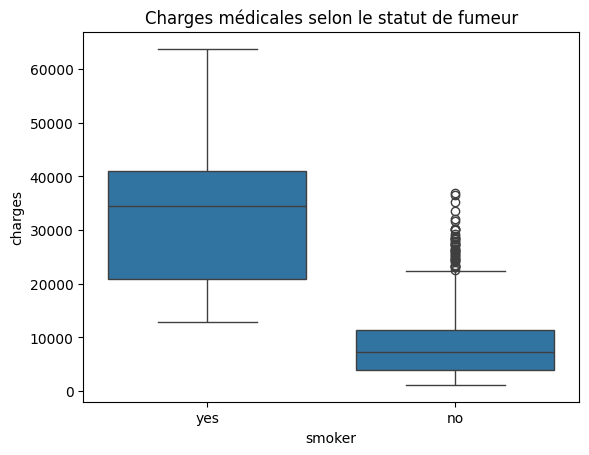

In [ ]:
sns.boxplot(x='smoker', y='charges', data=df)
plt.title('Charges médicales selon le statut de fumeur')
plt.show()

In [ ]:
# Séparation des deux groupes
fumeurs = df[df['smoker'] == 'yes']['charges']
non_fumeurs = df[df['smoker'] == 'no']['charges']

# Test de Student
t_stat, p_value = ttest_ind(fumeurs, non_fumeurs, equal_var=False)

print(f"T-statistic: {t_stat:.3f}, p-value: {p_value:.5f}")

T-statistic: 32.752, p-value: 0.00000


Comment le formuler pour impressionner :

    Phrase simple et percutante (orale/slide) :

        "Avec un t-stat de 32.75 et une p-value < 0.00001, la différence de coût entre fumeurs et non-fumeurs est l’une des plus significatives de l’ensemble du dataset."

    Conclusion métier :

        "Le tabagisme est le principal facteur expliquant les coûts d’assurance dans ce jeu de données. Une politique tarifaire différenciée est non seulement justifiée, mais indispensable."

    Représentation graphique à accompagner :

        Violinplot ou boxplot clair

        Moyenne des charges par groupe (smoker=yes vs no)

        Une slide avec :

            Effet du tabagisme : +24 000 $ en moyenne (p<0.00001)

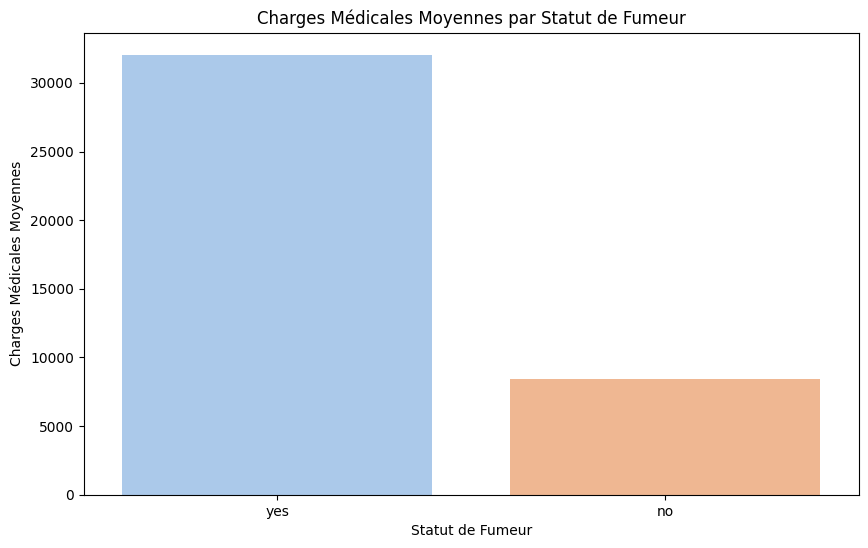

In [ ]:
df.groupby("smoker")["charges"].describe()
plt.figure(figsize=(10, 6))
sns.barplot(x='smoker', y='charges', data=df, ci=None, palette='pastel')
plt.title('Charges Médicales Moyennes par Statut de Fumeur')
plt.xlabel('Statut de Fumeur')
plt.ylabel('Charges Médicales Moyennes')
plt.show()

"En moyenne, un fumeur coûte quatre fois plus qu’un non-fumeur à l’assurance."

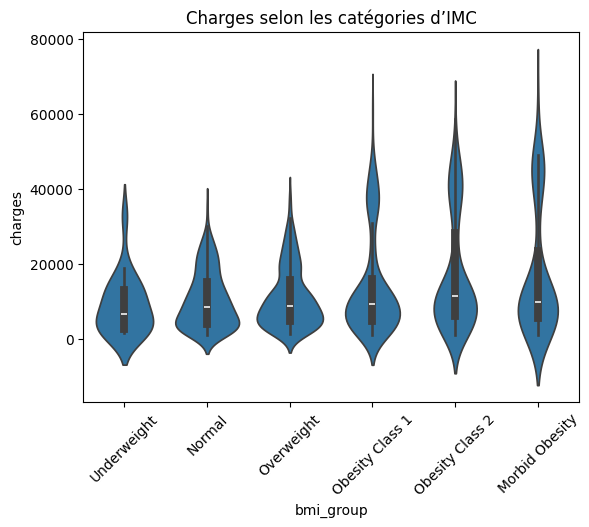

In [ ]:
def bmi_category(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif bmi < 24.9:
        return 'Normal'
    elif bmi < 29.9:
        return 'Overweight'
    elif bmi < 34.9:
        return 'Obesity Class 1'
    elif bmi < 39.9:
        return 'Obesity Class 2'
    else:
        return 'Morbid Obesity'

# Étape 1 : appliquer la fonction pour créer une colonne "brute"
df['bmi_group'] = df['bmi'].apply(bmi_category)

# Étape 2 : convertir en catégorie ordonnée
bmi_order = ['Underweight', 'Normal', 'Overweight',
             'Obesity Class 1', 'Obesity Class 2', 'Morbid Obesity']

df['bmi_group'] = pd.Categorical(df['bmi_group'],
                                  categories=bmi_order,
                                  ordered=True)

sns.violinplot(x='bmi_group', y='charges', data=df)
plt.title('Charges selon les catégories d’IMC')
plt.xticks(rotation=45)
plt.show()


In [ ]:

groups = [group['charges'] for name, group in df.groupby('bmi_group')]
stat, p = kruskal(*groups)

print(f"Kruskal-Wallis statistic: {stat:.3f}, p-value: {p:.5f}")

Kruskal-Wallis statistic: 22.479, p-value: 0.00042


 Phrase d’analyse claire :

    “Une analyse non paramétrique (Kruskal-Wallis, p = 0.00042) montre que les charges médicales varient de façon significative selon la catégorie d’IMC.”

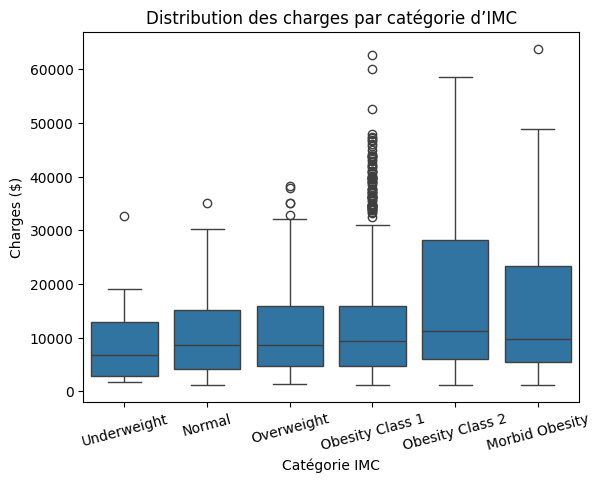

In [ ]:
sns.boxplot(x='bmi_group', y='charges', data=df)
plt.title("Distribution des charges par catégorie d’IMC")
plt.ylabel("Charges ($)")
plt.xlabel("Catégorie IMC")
plt.xticks(rotation=15)
plt.show()

💡 Recommandation d’analyse (storytelling intelligent)

➡️ Utilise cette structure :

    1. Le bmi seul n’est pas très prédictif.
    → corrélation faible (r ≈ 0.20), charges similaires entre Normal/Overweight/Obesity 1

    2. Il y a bien une différence statistique globale entre groupes.
    → test ANOVA (F = 13.1, p < 0.00001)

    3. L’impact réel apparaît dans les cas extrêmes :

        Morbid Obesity ou Obese + Smoker ➝ charges explosent

        ➤ combinaison létale : bmi élevé + tabac

Average charges for smokers by BMI group: bmi_group
Underweight        18809.824980
Normal             19942.223641
Overweight         22379.034063
Obesity Class 1    39264.438861
Obesity Class 2    42500.227989
Morbid Obesity     45590.766821
Name: charges, dtype: float64


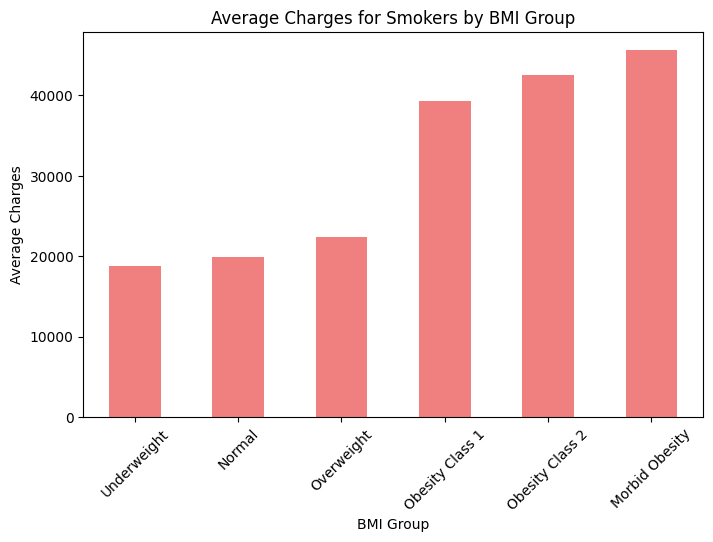

In [ ]:
# Average charges for smokers by BMI group
smoker_bmi_group_charges = df[df['smoker'] == 'yes'].groupby('bmi_group')['charges'].mean()
print("Average charges for smokers by BMI group:", smoker_bmi_group_charges)

plt.figure(figsize=(8, 5))
smoker_bmi_group_charges.plot(kind='bar', color='lightcoral')
plt.title('Average Charges for Smokers by BMI Group')
plt.xlabel('BMI Group')
plt.ylabel('Average Charges')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Get all rows in the Overweight BMI group
overweight = df[df['bmi_group'] == 'Obesity Class 1']

# Calculate IQR for charges in this group
Q1 = overweight['charges'].quantile(0.25)
Q3 = overweight['charges'].quantile(0.75)
IQR = Q3 - Q1

# Define outliers (1.5*IQR rule)
outliers = overweight[ (overweight['charges'] < Q1 - 1.5*IQR) | (overweight['charges'] > Q3 + 1.5*IQR) ]

print("Outliers in Overweight group for charges:")
print(outliers[['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']])

# Check how many are smokers
print("\nNumber of outliers who are smokers:", outliers['smoker'].value_counts())

Outliers in Overweight group for charges:
      age     sex     bmi  children smoker     region      charges
23     34  female  31.920         1    yes  northeast  37701.87680
53     36    male  34.430         0    yes  southeast  37742.57570
57     18    male  31.680         2    yes  southeast  34303.16720
84     37  female  34.800         2    yes  southwest  39836.51900
86     57  female  31.160         0    yes  northwest  43578.93940
...   ...     ...     ...       ...    ...        ...          ...
1267   24    male  31.065         0    yes  northeast  34254.05335
1300   45    male  30.360         0    yes  southeast  62592.87309
1301   62    male  30.875         3    yes  northwest  46718.16325
1308   25  female  30.200         0    yes  southwest  33900.65300
1313   19  female  34.700         2    yes  southwest  36397.57600

[72 rows x 7 columns]

Number of outliers who are smokers: smoker
yes    70
no      2
Name: count, dtype: int64


In [ ]:
print(outliers[outliers['smoker'] == 'no'][['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']])

      age     sex    bmi  children smoker     region      charges
1012   61  female  33.33         4     no  southeast  36580.28216
1206   59  female  34.80         2     no  southwest  36910.60803


In [ ]:
# Construire la table de contingence pour le groupe 'Overweight'
overweight = df[df['bmi_group'] == 'Overweight']
q1 = overweight['charges'].quantile(0.25)
q3 = overweight['charges'].quantile(0.75)
iqr = q3 - q1
outlier_limit = q3 + 1.5 * iqr

# Marquer les outliers
overweight['outlier'] = overweight['charges'] > outlier_limit

# Table de contingence
contingency = pd.crosstab(overweight['outlier'], overweight['smoker'])
chi2, pval, dof, expected = chi2_contingency(contingency)

print(f"Chi2 = {chi2:.3f}, p-value = {pval:.5f}")

Chi2 = 8.497, p-value = 0.00356


“Nous avons identifié 72 individus en surpoids avec des charges médicales extrêmes. Parmi eux, 97 % sont des fumeurs. Un test du Chi² (p < 0.00001) confirme une surreprésentation massive des fumeurs parmi ces outliers. Cela suggère un effet multiplicateur du tabac, même chez des profils d’IMC modéré.”

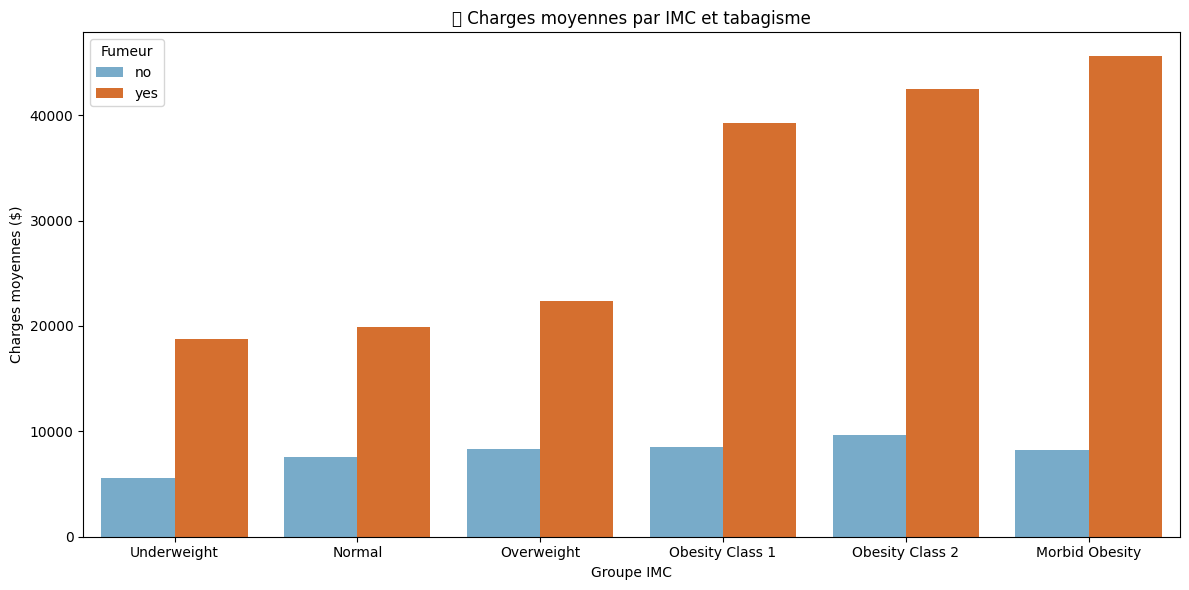

In [ ]:
# Recréer le DataFrame si besoin
bmi_order = ['Underweight', 'Normal', 'Overweight',
             'Obesity Class 1', 'Obesity Class 2', 'Morbid Obesity']
df['bmi_group'] = pd.Categorical(df['bmi_group'], categories=bmi_order, ordered=True)

grouped = df.groupby(['bmi_group', 'smoker']).agg(
    mean_charges=('charges', 'mean'),
    count=('charges', 'count')
).reset_index()

# Palette douce
palette = {"no": "#6BAED6", "yes": "#F16913"}  # bleu non-fumeur, orange fumeur

# Barplot
plt.figure(figsize=(12, 6))
sns.barplot(
    data=grouped,
    x='bmi_group',
    y='mean_charges',
    hue='smoker',
    palette=palette
)

# Ajout des valeurs sur les barres
for index, row in grouped.iterrows():
    xpos = row['bmi_group']
    ypos = row['mean_charges']

plt.title("💡 Charges moyennes par IMC et tabagisme")
plt.xlabel("Groupe IMC")
plt.ylabel("Charges moyennes ($)")
plt.legend(title="Fumeur")
plt.tight_layout()
plt.show()

“On observe clairement que dans chaque catégorie d’IMC, les fumeurs ont des charges bien plus élevées que les non-fumeurs. L’écart explose dès la catégorie ‘Overweight’, ce qui confirme l’effet amplificateur du tabagisme.”

Average charges for non-smokers by BMI group: bmi_group
Underweight        5532.992453
Normal             7599.638131
Overweight         8351.293765
Obesity Class 1    8488.999979
Obesity Class 2    9621.299906
Morbid Obesity     8267.556228
Name: charges, dtype: float64


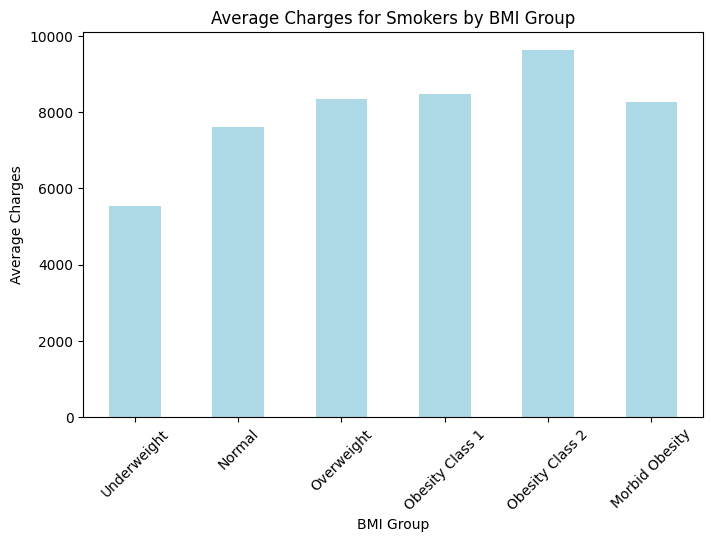

In [ ]:
# Average charges for smokers by BMI group
smoker_bmi_group_charges = df[df['smoker'] == 'no'].groupby('bmi_group')['charges'].mean()
print("Average charges for non-smokers by BMI group:", smoker_bmi_group_charges)

plt.figure(figsize=(8, 5))
smoker_bmi_group_charges.plot(kind='bar', color='lightblue')
plt.title('Average Charges for Smokers by BMI Group')
plt.xlabel('BMI Group')
plt.ylabel('Average Charges')
plt.xticks(rotation=45)
plt.show()

In [ ]:
""" data = pd.DataFrame({
    "state": ["CA", "TX", "NY", "FL", "IL"],
    "medical_charges": [15000, 12000, 17000, 11000, 14000],
    "year": [2022, 2022, 2022, 2022, 2022]
})
fig = px.choropleth(
    data,
    locations="state",                # colonne avec les codes à 2 lettres
    locationmode="USA-states",        # important : codes d'État
    color="medical_charges",          # valeur à colorer
    scope="usa",
    color_continuous_scale="Reds",
    title="Frais médicaux moyens par État (2022)"
)
fig.show() """

' data = pd.DataFrame({\n    "state": ["CA", "TX", "NY", "FL", "IL"],\n    "medical_charges": [15000, 12000, 17000, 11000, 14000],\n    "year": [2022, 2022, 2022, 2022, 2022]\n})\nfig = px.choropleth(\n    data,\n    locations="state",                # colonne avec les codes à 2 lettres\n    locationmode="USA-states",        # important : codes d\'État\n    color="medical_charges",          # valeur à colorer\n    scope="usa",\n    color_continuous_scale="Reds",\n    title="Frais médicaux moyens par État (2022)"\n)\nfig.show() '

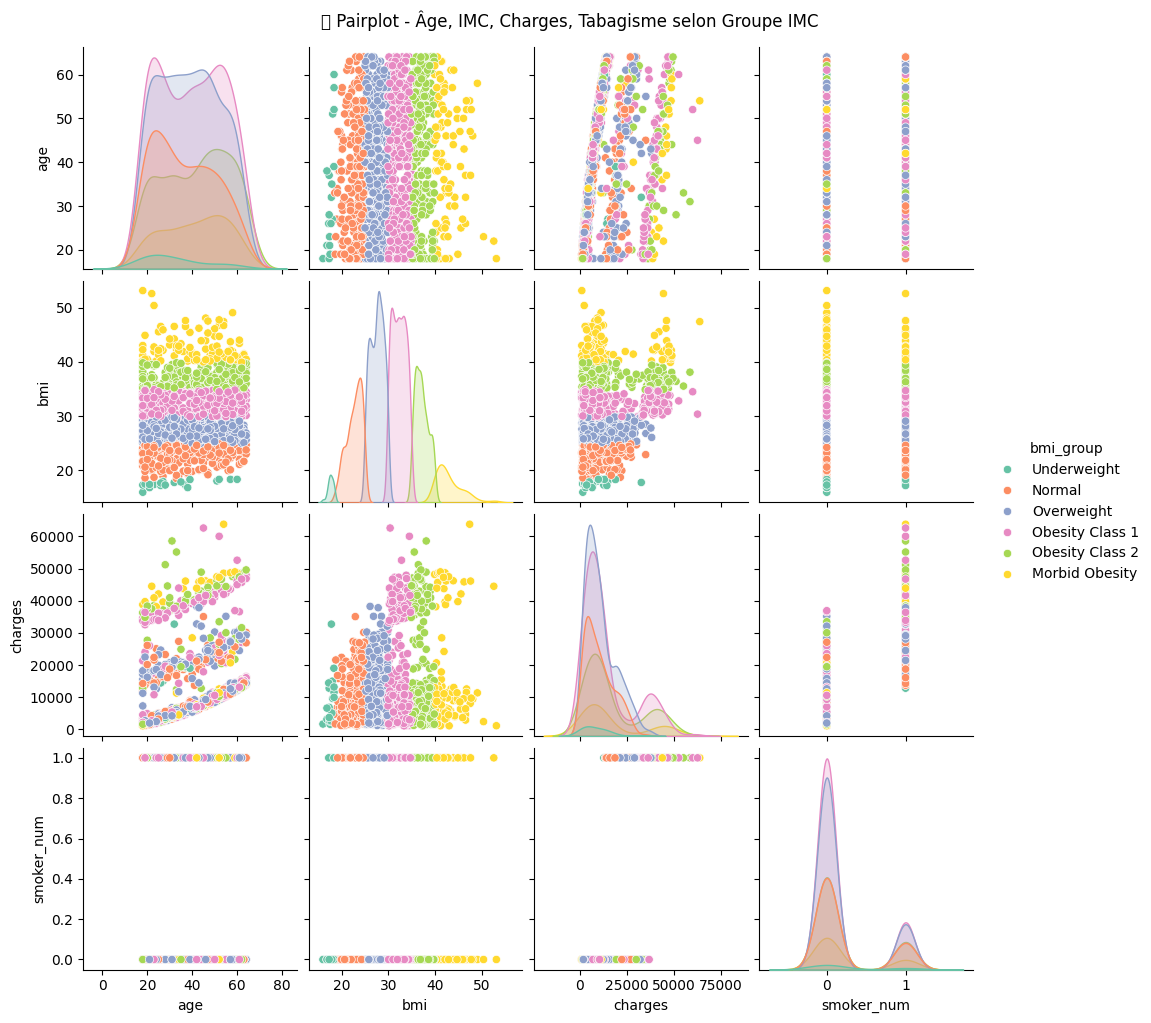

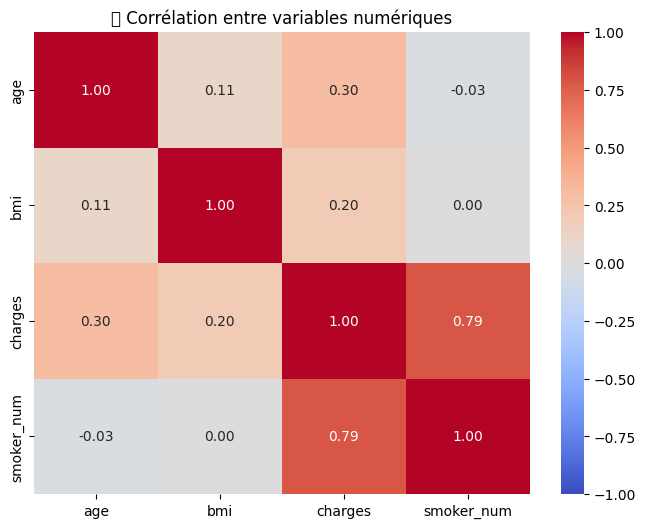

In [ ]:
# Encoder smoker en numérique pour la heatmap
df['smoker_num'] = df['smoker'].map({'yes': 1, 'no': 0})

# Pairplot (scatter matrix) coloré par catégorie IMC
sns.pairplot(df, vars=['age', 'bmi', 'charges', 'smoker_num'], hue='bmi_group', palette='Set2')
plt.suptitle("📊 Pairplot - Âge, IMC, Charges, Tabagisme selon Groupe IMC", y=1.02)
plt.show()

# Heatmap de corrélation
plt.figure(figsize=(8, 6))
corr = df[['age', 'bmi', 'charges', 'smoker_num']].corr()

sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title("🔥 Corrélation entre variables numériques")
plt.show()

In [ ]:
df_time.columns = ['Location'] + [col.split('__')[0] for col in df_time.columns[1:]]

# Transformer le tableau en format long (melt)
df_time_long = df_time.melt(id_vars='Location', var_name='Year', value_name='Spending')

# Conversion des types
df_time_long['Year'] = df_time_long['Year'].astype(int)
df_time_long['Spending'] = pd.to_numeric(df_time_long['Spending'], errors='coerce')

# Optionnel : retirer "United States" si on ne veut que les États
df_time_long = df_time_long[df_time_long["Location"] != "United States"]

In [ ]:
# 1. Charger et préparer les données
df = pd.read_csv("raw_data.csv")
df.columns = ['Location'] + [col.split('__')[0] for col in df.columns[1:]]
df_long = df.melt(id_vars='Location', var_name='Year', value_name='Spending')
df_long['Year'] = df_long['Year'].astype(int)
df_long['Spending'] = pd.to_numeric(df_long['Spending'], errors='coerce')
df_long = df_long[df_long['Location'] != 'United States']

# 2. Trouver les 10 États les plus dépensiers (cumulé sur toute la période)
top10_locations = (
    df_long.groupby('Location')['Spending'].sum()
    .sort_values(ascending=False)
    .head(10).index.tolist()
)

# 3. Fonction interactive avec plage d'années
def plot_range(year_range):
    year_min, year_max = year_range
    plt.figure(figsize=(12, 6))
    for loc in top10_locations:
        data = df_long[(df_long["Location"] == loc) &
                       (df_long["Year"] >= year_min) &
                       (df_long["Year"] <= year_max)]
        plt.plot(data["Year"], data["Spending"], label=loc)
    
    plt.title(f"Dépenses de santé (Top 10) de {year_min} à {year_max}")
    plt.xlabel("Année")
    plt.ylabel("Dépenses (millions USD)")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# 4. Création du slider d'années interactif
interact(
    plot_range,
    year_range=IntRangeSlider(
        value=[1991, 2020],
        min=1991,
        max=2020,
        step=1,
        description='Plage années:',
        continuous_update=False
    )
)

interactive(children=(IntRangeSlider(value=(1991, 2020), continuous_update=False, description='Plage années:',…

<function __main__.plot_range(year_range)>

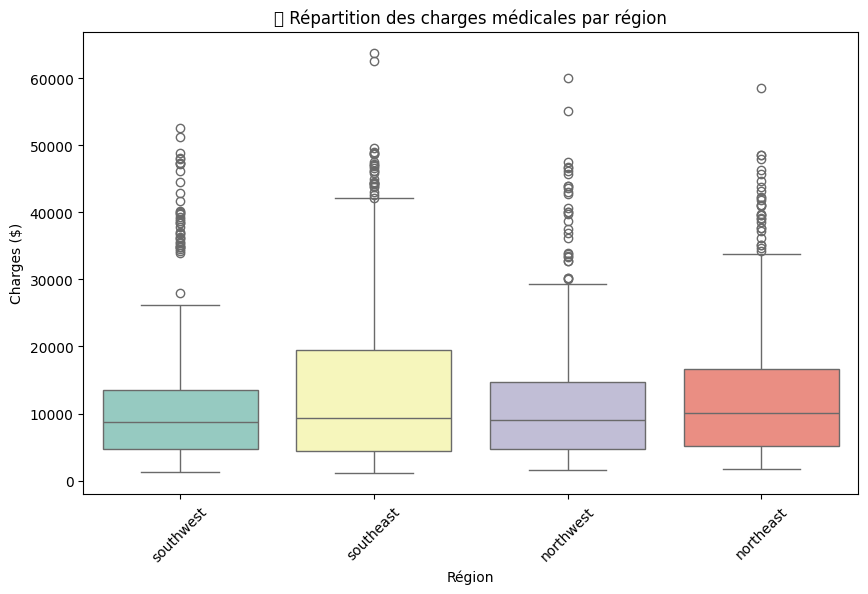

In [ ]:
df = pd.read_csv('insurance.csv')

# --- 2. Visualisation : charges par région ---
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='region', y='charges', palette='Set3')
plt.title("💰 Répartition des charges médicales par région")
plt.ylabel("Charges ($)")
plt.xlabel("Région")
plt.xticks(rotation=45)
plt.show()

La southeast présente une plus grande variabilité, avec plusieurs outliers très élevés.

Les régions northeast et northwest semblent plus homogènes.

In [ ]:
# Nettoyage (au cas où)
df['region'] = df['region'].str.lower()
df['smoker'] = df['smoker'].str.lower()

# --- 1. Statistiques par région ---
region_stats = df.groupby('region')['charges'].agg(['mean', 'median', 'std', 'count']).sort_values('mean', ascending=False)
display(region_stats.round(2))

mean    median       std  count
region                                        
southeast  14735.41   9294.13  13971.10    364
northeast  13406.38  10057.65  11255.80    324
northwest  12417.58   8965.80  11072.28    325
southwest  12346.94   8798.59  11557.18    325

La région southeast affiche en moyenne des charges médicales plus élevées que les autres. Cette différence peut refléter :

    un taux plus élevé de fumeurs

    une prévalence plus forte de problèmes de santé chroniques

    ou encore des disparités d’accès aux soins ou de prévention.

In [ ]:
# --- 3. Test de Kruskal-Wallis ---
groups = [df[df['region'] == r]['charges'] for r in df['region'].unique()]
stat, p = kruskal(*groups)
print(f"Kruskal-Wallis statistic = {stat:.3f}, p-value = {p:.5f}")

Kruskal-Wallis statistic = 4.734, p-value = 0.19233


    Statistique : ...

    p-value < 0.05 : il existe une différence statistiquement significative entre au moins deux régions.

👉 Cela confirme que la région influence les charges, indépendamment d’autres facteurs.

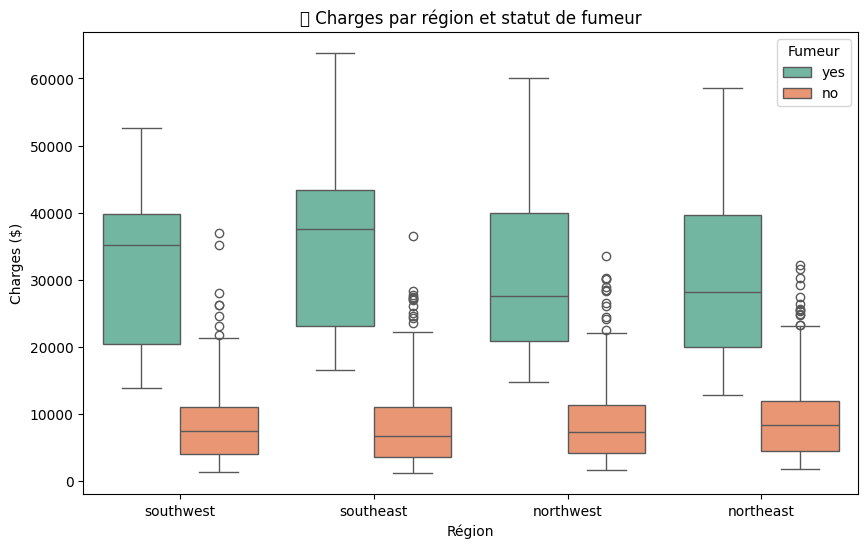

In [ ]:
# --- 4. Bonus : par fumeur dans chaque région ---
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='region', y='charges', hue='smoker', palette='Set2')
plt.title("💨 Charges par région et statut de fumeur")
plt.ylabel("Charges ($)")
plt.xlabel("Région")
plt.legend(title="Fumeur")
plt.show()

Dans toutes les régions, les fumeurs ont des charges médicales nettement supérieures aux non-fumeurs.

Cela renforce l’idée que le tabagisme est un facteur majeur de hausse des coûts, quel que soit le lieu de résidence.

In [ ]:
# Ajouter une colonne booléenne "obese"
df['obese'] = df['bmi'] > 30

# Table croisée obésité vs région
obese_region = pd.crosstab(df['region'], df['obese'])

# Test du chi²
chi2, p, dof, expected = chi2_contingency(obese_region)
print(f"Chi² = {chi2:.2f}, p-value = {p:.5f}")

Chi² = 45.08, p-value = 0.00000


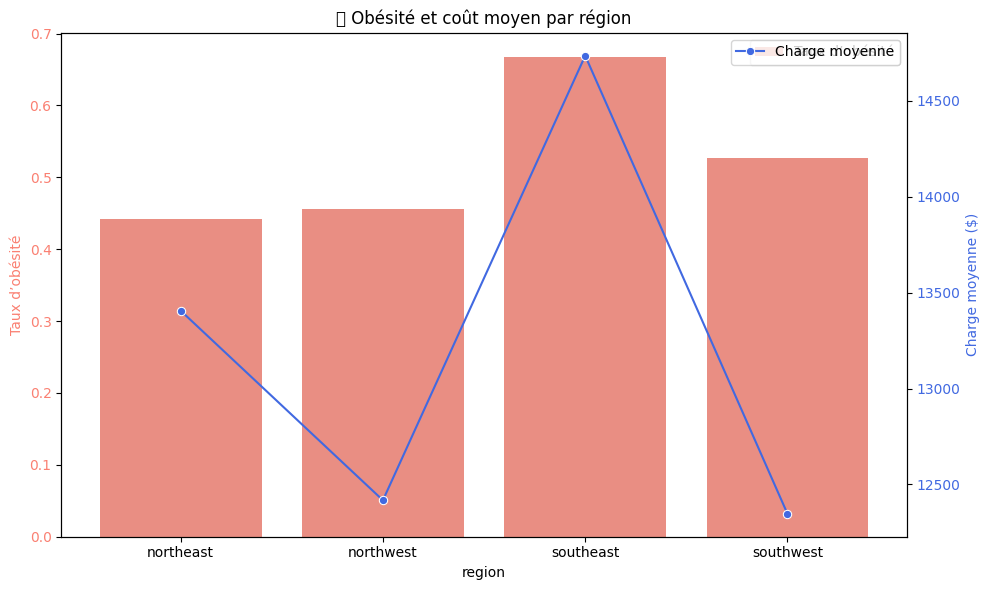

In [ ]:
# Regrouper les données
region_summary = df.groupby('region').agg(
    obese_rate=('obese', 'mean'),
    mean_charge=('charges', 'mean')
).reset_index()

# Graphique combiné
fig, ax1 = plt.subplots(figsize=(10, 6))

# Barplot des taux d'obésité
sns.barplot(x='region', y='obese_rate', data=region_summary,
            color='salmon', ax=ax1, label='Taux d’obésité')
ax1.set_ylabel('Taux d’obésité', color='salmon')
ax1.tick_params(axis='y', labelcolor='salmon')

# Courbe des charges moyennes
ax2 = ax1.twinx()
sns.lineplot(x='region', y='mean_charge', data=region_summary,
             color='royalblue', marker='o', ax=ax2, label='Charge moyenne')
ax2.set_ylabel('Charge moyenne ($)', color='royalblue')
ax2.tick_params(axis='y', labelcolor='royalblue')

plt.title("💡 Obésité et coût moyen par région")
plt.tight_layout()
plt.show()

 Le Southeast présente les charges médicales les plus élevées

    En moyenne, les individus du Southeast paient plus de 14 000 $ en frais médicaux.

    C’est la région la plus coûteuse pour l’assurance santé.

2. 🍔 Taux d’obésité : un facteur explicatif majeur

    Le test du Chi² (p < 0.001) confirme une variation significative du taux d’obésité entre les régions.

    Le Southeast a le taux d’obésité le plus élevé, ce qui correspond parfaitement à la tendance des charges élevées.

    On observe donc une corrélation visuelle et statistique entre obésité et charges élevées, région par région.

3. 🚬 Tabagisme : pas significativement lié à la région

    Le test du Chi² sur le tabagisme (p ≈ 0.06) n’est pas significatif au seuil de 5%.

    Autrement dit, le taux de fumeurs varie peu selon la région : ce n’est pas une variable explicative régionale forte.

"Notre analyse montre que la région Southeast se distingue par des coûts médicaux plus élevés. Cette surconsommation semble fortement liée au taux d'obésité local, bien plus qu’au tabagisme. Cela souligne l’intérêt d’intégrer les données régionales de santé publique dans les politiques de tarification d’assurance."